# Check the data

In [45]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc90/BHOSS_CODE"
data = "Rh1_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A93_142.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9468.501436 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 1.6344e-11 0.00160014
Total flux = 1.921501 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9497.623989 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 9.41275e-08 0.00360312
Total flux = 2.002618 Jy at 230 GHz
165:41:02.382 - Start Program


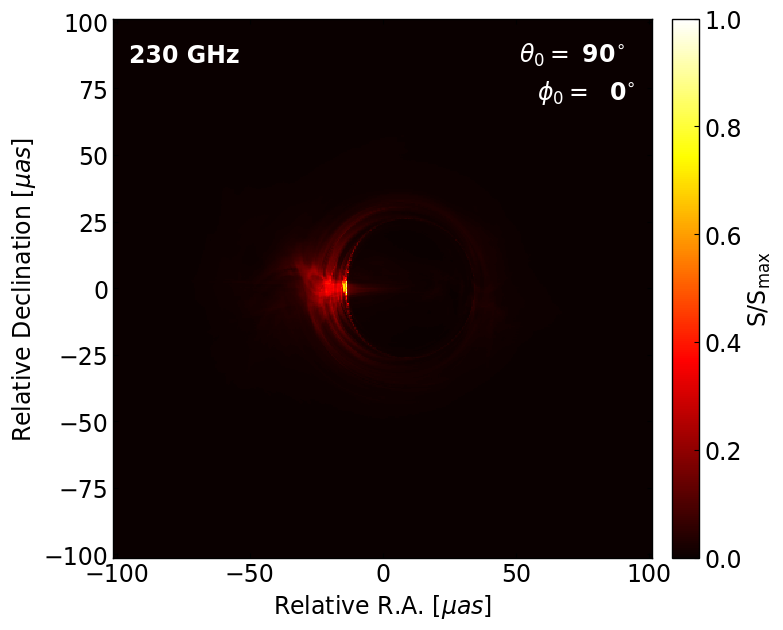

In [16]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name, ifreq=2):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

## Rhigh=1

In [2]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 10, 0, "MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 1.578097 at 9008.139053
97, flux: 1.532838 at 9017.844868
98, flux: 1.520903 at 9027.551100
99, flux: 1.520994 at 9038.646851
100, flux: 1.521945 at 9048.356431
101, flux: 1.521874 at 9058.061637
102, flux: 1.515480 at 9067.764826
103, flux: 1.484756 at 9077.464542
104, flux: 1.439913 at 9088.552963
105, flux: 1.414187 at 9098.254801
106, flux: 1.403013 at 9107.957635
107, flux: 1.372682 at 9117.659184
108, flux: 1.351117 at 9127.363548
109, flux: 1.363152 at 9138.452062
110, flux: 1.386846 at 9148.158890
111, flux: 1.425745 at 9157.868704
112, flux: 1.457415 at 9167.579583
113, flux: 1.481189 at 9178.672003
114, flux: 1.505219 at 9188.377169
115, flux: 1.516561 at 9198.079088
116, flux: 1.507621 at 9207.781556
117, flux: 1.491068 at 9217.482565
118, flux: 1.482389 at 9228.573654
119, flux: 1.470150 at 9238.281441
120, flux: 1.474014 at

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.030816 Jy, the density scale = 4.500000e-19


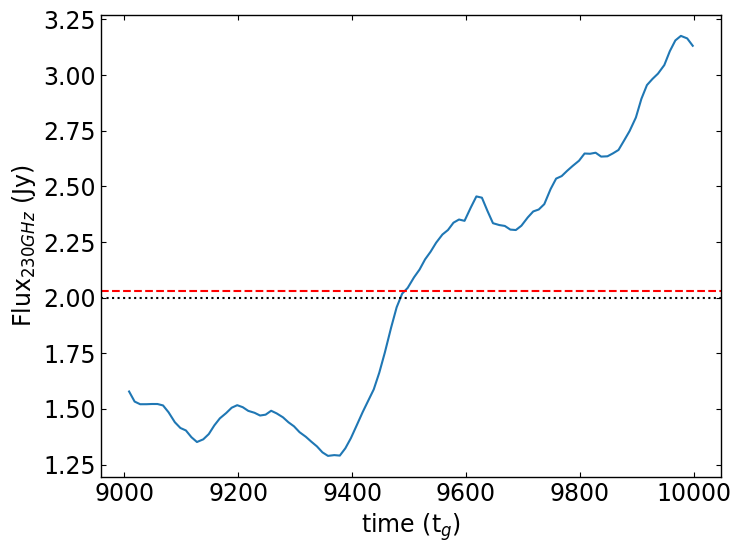

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc30/BHOSS_CODE
96, flux: 1.599707 at 9008.139053
97, flux: 1.552323 at 9017.844868
98, flux: 1.536928 at 9027.551100
99, flux: 1.529027 at 9038.646851
100, flux: 1.530785 at 9048.356431
101, flux: 1.532954 at 9058.061637
102, flux: 1.527138 at 9067.764826
103, flux: 1.491381 at 9077.464542
104, flux: 1.443680 at 9088.552963
105, flux: 1.415175 at 9098.254801
106, flux: 1.404413 at 9107.957635
107, flux: 1.373756 at 9117.659184
108, flux: 1.351529 at 9127.363548
109, flux: 1.357949 at 9138.452062
110, flux: 1.379814 at 9148.158890
111, flux: 1.415595 at 9157.868704
112, flux: 1.446630 at 9167.579583
113, flux: 1.472421 at 9178.672003
114, flux: 1.493002 at 9188.377169
115, flux: 1.485902 at 9198.079088
116, flux: 1.465786 at 9207.781556
117, flux: 1.445434 at 9217.482565
118, flux: 1.439391 at 9228.573654
119, flux: 1.425158 at 9238.281441
120, flux: 1.427199 at 9247.990304
121, flux: 1.444475 at 9257.698128
122, flux:

In [24]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [25]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.977296 Jy, the density scale = 4.350000e-19


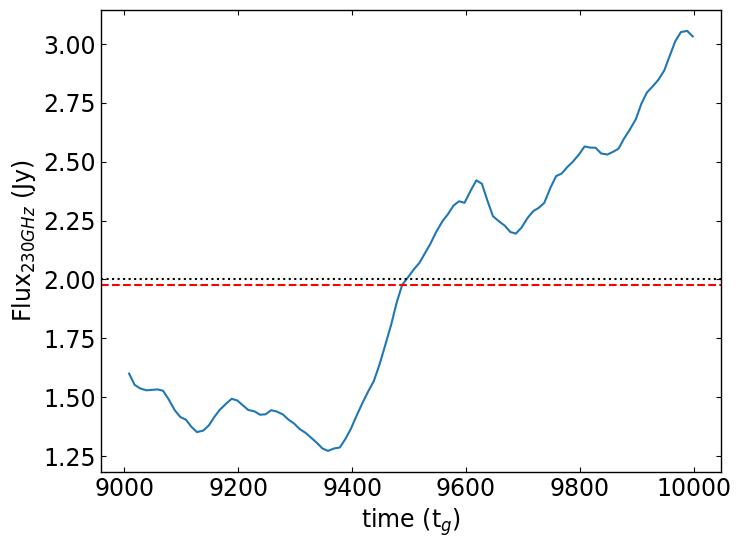

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [27]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.599707 Jy at 9008.139053
97:: 1.552323 Jy at 9017.844868
98:: 1.536928 Jy at 9027.551100
99:: 1.529027 Jy at 9038.646851
100:: 1.530785 Jy at 9048.356431
101:: 1.532954 Jy at 9058.061637
102:: 1.527138 Jy at 9067.764826
103:: 1.491381 Jy at 9077.464542
104:: 1.443680 Jy at 9088.552963
105:: 1.415175 Jy at 9098.254801
106:: 1.404413 Jy at 9107.957635
107:: 1.373756 Jy at 9117.659184
108:: 1.351529 Jy at 9127.363548
109:: 1.357949 Jy at 9138.452062
110:: 1.379814 Jy at 9148.158890
111:: 1.415595 Jy at 9157.868704
112:: 1.446630 Jy at 9167.579583
113:: 1.472421 Jy at 9178.672003
114:: 1.493002 Jy at 9188.377169
115:: 1.485902 Jy at 9198.079088
116:: 1.465786 Jy at 9207.781556
117:: 1.445434 Jy at 9217.482565
118:: 1.439391 Jy at 9228.573654
119:: 1.425158 Jy at 9238.281441
120:: 1.427199 Jy at 9247.990304
121:: 1.444475 Jy at 9257.698128
122:: 1.439056 Jy at 9267.401850
123:: 1.426148 Jy at 9278.487308
124:: 1.404298 Jy at 9288.189770
125:: 1.388220 Jy at 9297.894634
126:: 1.364894

In [6]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 50, 0, "MADS41A93",ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 1.615281 at 9008.139053
97, flux: 1.567553 at 9017.844868
98, flux: 1.544279 at 9027.551100
99, flux: 1.522301 at 9038.646851
100, flux: 1.525111 at 9048.356431
101, flux: 1.529851 at 9058.061637
102, flux: 1.520277 at 9067.764826
103, flux: 1.481084 at 9077.464542
104, flux: 1.441778 at 9088.552963
105, flux: 1.418822 at 9098.254801
106, flux: 1.415503 at 9107.957635
107, flux: 1.390120 at 9117.659184
108, flux: 1.369742 at 9127.363548
109, flux: 1.372656 at 9138.452062
110, flux: 1.381461 at 9148.158890
111, flux: 1.411611 at 9157.868704
112, flux: 1.442466 at 9167.579583
113, flux: 1.484376 at 9178.672003
114, flux: 1.485805 at 9188.377169
115, flux: 1.463703 at 9198.079088
116, flux: 1.440086 at 9207.781556
117, flux: 1.416864 at 9217.482565
118, flux: 1.412856 at 9228.573654
119, flux: 1.398755 at 9238.281441
120, flux: 1.393871 at

In [7]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [8]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.923307 Jy, the density scale = 4.100000e-19


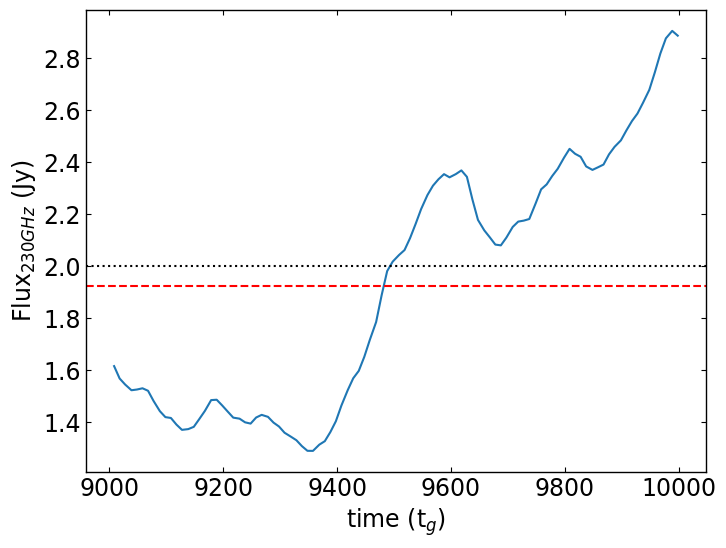

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [10]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.615281 Jy at 9008.139053
97:: 1.567553 Jy at 9017.844868
98:: 1.544279 Jy at 9027.551100
99:: 1.522301 Jy at 9038.646851
100:: 1.525111 Jy at 9048.356431
101:: 1.529851 Jy at 9058.061637
102:: 1.520277 Jy at 9067.764826
103:: 1.481084 Jy at 9077.464542
104:: 1.441778 Jy at 9088.552963
105:: 1.418822 Jy at 9098.254801
106:: 1.415503 Jy at 9107.957635
107:: 1.390120 Jy at 9117.659184
108:: 1.369742 Jy at 9127.363548
109:: 1.372656 Jy at 9138.452062
110:: 1.381461 Jy at 9148.158890
111:: 1.411611 Jy at 9157.868704
112:: 1.442466 Jy at 9167.579583
113:: 1.484376 Jy at 9178.672003
114:: 1.485805 Jy at 9188.377169
115:: 1.463703 Jy at 9198.079088
116:: 1.440086 Jy at 9207.781556
117:: 1.416864 Jy at 9217.482565
118:: 1.412856 Jy at 9228.573654
119:: 1.398755 Jy at 9238.281441
120:: 1.393871 Jy at 9247.990304
121:: 1.417306 Jy at 9257.698128
122:: 1.427556 Jy at 9267.401850
123:: 1.419869 Jy at 9278.487308
124:: 1.397804 Jy at 9288.189770
125:: 1.382571 Jy at 9297.894634
126:: 1.358693

In [46]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc70/BHOSS_CODE
96, flux: 1.704228 at 9008.139053
97, flux: 1.644037 at 9017.844868
98, flux: 1.596899 at 9027.551100
99, flux: 1.572567 at 9038.646851
100, flux: 1.584633 at 9048.356431
101, flux: 1.603630 at 9058.061637
102, flux: 1.600101 at 9067.764826
103, flux: 1.554316 at 9077.464542
104, flux: 1.536429 at 9088.552963
105, flux: 1.505288 at 9098.254801
106, flux: 1.506909 at 9107.957635
107, flux: 1.499264 at 9117.659184
108, flux: 1.476750 at 9127.363548
109, flux: 1.436013 at 9138.452062
110, flux: 1.439548 at 9148.158890
111, flux: 1.489292 at 9157.868704
112, flux: 1.523245 at 9167.579583
113, flux: 1.547579 at 9178.672003
114, flux: 1.556404 at 9188.377169
115, flux: 1.546088 at 9198.079088
116, flux: 1.505187 at 9207.781556
117, flux: 1.478179 at 9217.482565
118, flux: 1.494754 at 9228.573654
119, flux: 1.498959 at 9238.281441
120, flux: 1.497708 at 9247.990304
121, flux: 1.562978 at 9257.698128
122, flux:

In [47]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [48]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.013553 Jy, the density scale = 3.950000e-19


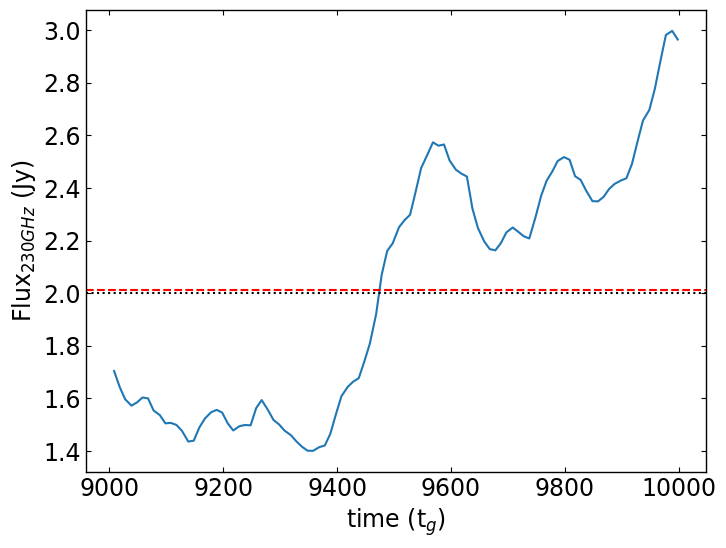

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [50]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.704228 Jy at 9008.139053
97:: 1.644037 Jy at 9017.844868
98:: 1.596899 Jy at 9027.551100
99:: 1.572567 Jy at 9038.646851
100:: 1.584633 Jy at 9048.356431
101:: 1.603630 Jy at 9058.061637
102:: 1.600101 Jy at 9067.764826
103:: 1.554316 Jy at 9077.464542
104:: 1.536429 Jy at 9088.552963
105:: 1.505288 Jy at 9098.254801
106:: 1.506909 Jy at 9107.957635
107:: 1.499264 Jy at 9117.659184
108:: 1.476750 Jy at 9127.363548
109:: 1.436013 Jy at 9138.452062
110:: 1.439548 Jy at 9148.158890
111:: 1.489292 Jy at 9157.868704
112:: 1.523245 Jy at 9167.579583
113:: 1.547579 Jy at 9178.672003
114:: 1.556404 Jy at 9188.377169
115:: 1.546088 Jy at 9198.079088
116:: 1.505187 Jy at 9207.781556
117:: 1.478179 Jy at 9217.482565
118:: 1.494754 Jy at 9228.573654
119:: 1.498959 Jy at 9238.281441
120:: 1.497708 Jy at 9247.990304
121:: 1.562978 Jy at 9257.698128
122:: 1.593689 Jy at 9267.401850
123:: 1.555997 Jy at 9278.487308
124:: 1.518144 Jy at 9288.189770
125:: 1.501275 Jy at 9297.894634
126:: 1.477700

In [11]:
ind,time,z_tot,dscale = bhoss_avg(1, 1, 1, 90, 0, "MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 1.611718 at 9008.139053
97, flux: 1.582322 at 9017.844868
98, flux: 1.554512 at 9027.551100
99, flux: 1.537072 at 9038.646851
100, flux: 1.562891 at 9048.356431
101, flux: 1.551477 at 9058.061637
102, flux: 1.547668 at 9067.764826
103, flux: 1.498326 at 9077.464542
104, flux: 1.463869 at 9088.552963
105, flux: 1.441717 at 9098.254801
106, flux: 1.462628 at 9107.957635
107, flux: 1.466522 at 9117.659184
108, flux: 1.432170 at 9127.363548
109, flux: 1.420171 at 9138.452062
110, flux: 1.418730 at 9148.158890
111, flux: 1.466184 at 9157.868704
112, flux: 1.502852 at 9167.579583
113, flux: 1.515976 at 9178.672003
114, flux: 1.488531 at 9188.377169
115, flux: 1.482328 at 9198.079088
116, flux: 1.471272 at 9207.781556
117, flux: 1.465740 at 9217.482565
118, flux: 1.502673 at 9228.573654
119, flux: 1.515394 at 9238.281441
120, flux: 1.494062 at

In [12]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [13]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.952081 Jy, the density scale = 3.700000e-19


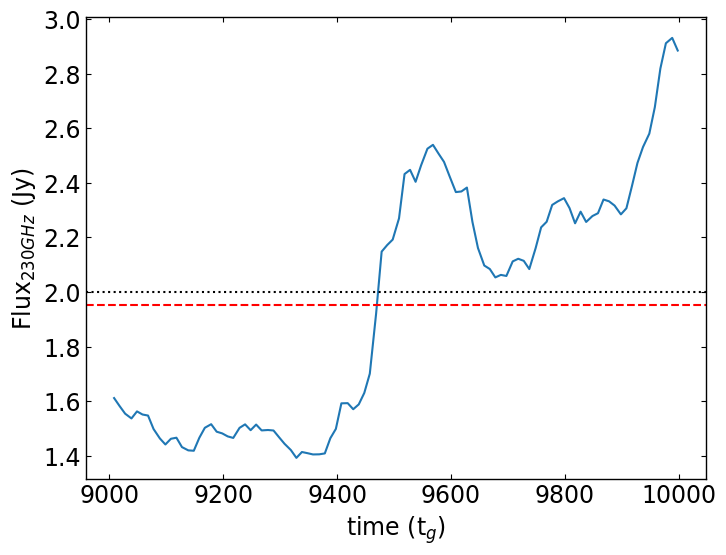

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh=5

In [22]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc10/BHOSS_CODE
96, flux: 1.994528 at 9008.139053
97, flux: 1.928447 at 9017.844868
98, flux: 1.899697 at 9027.551100
99, flux: 1.900677 at 9038.646851
100, flux: 1.914872 at 9048.356431
101, flux: 1.914257 at 9058.061637
102, flux: 1.917370 at 9067.764826
103, flux: 1.884751 at 9077.464542
104, flux: 1.819133 at 9088.552963
105, flux: 1.784508 at 9098.254801
106, flux: 1.775730 at 9107.957635
107, flux: 1.762414 at 9117.659184
108, flux: 1.732679 at 9127.363548
109, flux: 1.729386 at 9138.452062
110, flux: 1.739147 at 9148.158890
111, flux: 1.766267 at 9157.868704
112, flux: 1.767492 at 9167.579583
113, flux: 1.759145 at 9178.672003
114, flux: 1.773610 at 9188.377169
115, flux: 1.785179 at 9198.079088
116, flux: 1.753282 at 9207.781556
117, flux: 1.703426 at 9217.482565
118, flux: 1.657225 at 9228.573654
119, flux: 1.641946 at 9238.281441
120, flux: 1.634743 at 9247.990304
121, flux: 1.626396 at 9257.698128
122, flux:

In [23]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [24]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.012264 Jy, the density scale = 7.700000e-19


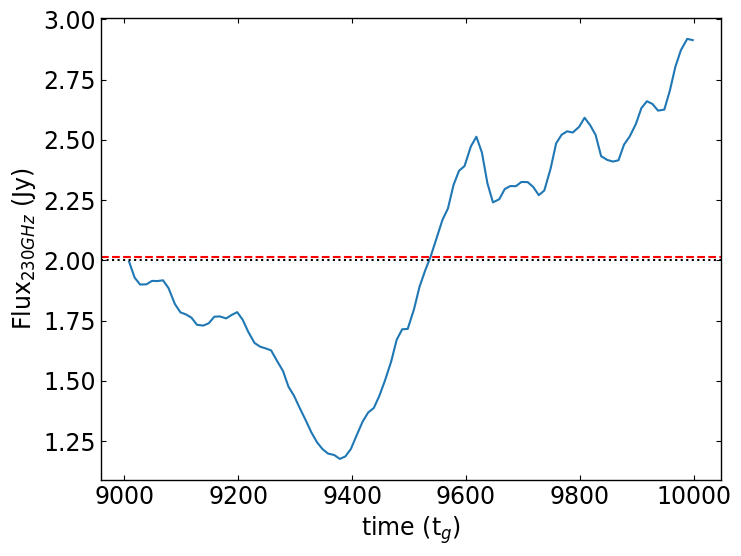

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [26]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 1.994528 Jy at 9008.139053
97:: 1.928447 Jy at 9017.844868
98:: 1.899697 Jy at 9027.551100
99:: 1.900677 Jy at 9038.646851
100:: 1.914872 Jy at 9048.356431
101:: 1.914257 Jy at 9058.061637
102:: 1.917370 Jy at 9067.764826
103:: 1.884751 Jy at 9077.464542
104:: 1.819133 Jy at 9088.552963
105:: 1.784508 Jy at 9098.254801
106:: 1.775730 Jy at 9107.957635
107:: 1.762414 Jy at 9117.659184
108:: 1.732679 Jy at 9127.363548
109:: 1.729386 Jy at 9138.452062
110:: 1.739147 Jy at 9148.158890
111:: 1.766267 Jy at 9157.868704
112:: 1.767492 Jy at 9167.579583
113:: 1.759145 Jy at 9178.672003
114:: 1.773610 Jy at 9188.377169
115:: 1.785179 Jy at 9198.079088
116:: 1.753282 Jy at 9207.781556
117:: 1.703426 Jy at 9217.482565
118:: 1.657225 Jy at 9228.573654
119:: 1.641946 Jy at 9238.281441
120:: 1.634743 Jy at 9247.990304
121:: 1.626396 Jy at 9257.698128
122:: 1.585509 Jy at 9267.401850
123:: 1.541205 Jy at 9278.487308
124:: 1.475662 Jy at 9288.189770
125:: 1.438193 Jy at 9297.894634
126:: 1.388891

In [27]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc30/BHOSS_CODE
96, flux: 2.069197 at 9008.139053
97, flux: 2.004214 at 9017.844868
98, flux: 1.973891 at 9027.551100
99, flux: 1.963463 at 9038.646851
100, flux: 1.977339 at 9048.356431
101, flux: 1.974907 at 9058.061637
102, flux: 1.976565 at 9067.764826
103, flux: 1.929151 at 9077.464542
104, flux: 1.865510 at 9088.552963
105, flux: 1.831148 at 9098.254801
106, flux: 1.831152 at 9107.957635
107, flux: 1.826766 at 9117.659184
108, flux: 1.802747 at 9127.363548
109, flux: 1.790598 at 9138.452062
110, flux: 1.794203 at 9148.158890
111, flux: 1.807480 at 9157.868704
112, flux: 1.803832 at 9167.579583
113, flux: 1.803000 at 9178.672003
114, flux: 1.819377 at 9188.377169
115, flux: 1.813031 at 9198.079088
116, flux: 1.772885 at 9207.781556
117, flux: 1.720348 at 9217.482565
118, flux: 1.675807 at 9228.573654
119, flux: 1.659048 at 9238.281441
120, flux: 1.650960 at 9247.990304
121, flux: 1.646923 at 9257.698128
122, flux:

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.012054 Jy, the density scale = 7.550000e-19


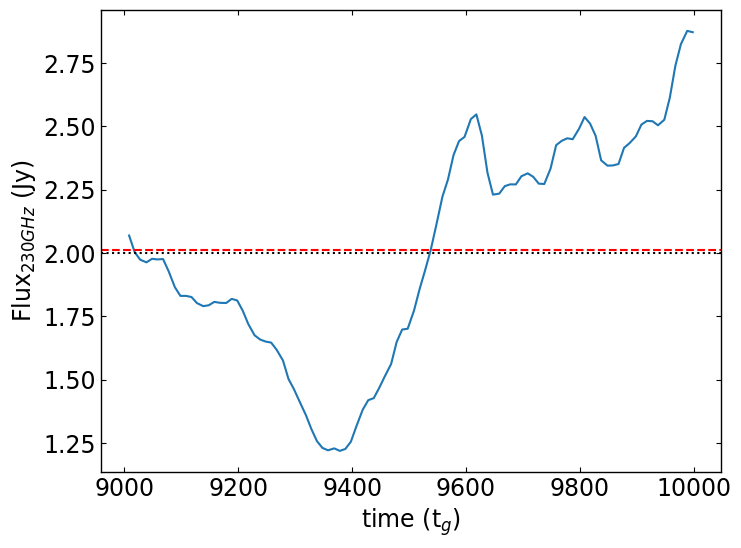

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.069197 Jy at 9008.139053
97:: 2.004214 Jy at 9017.844868
98:: 1.973891 Jy at 9027.551100
99:: 1.963463 Jy at 9038.646851
100:: 1.977339 Jy at 9048.356431
101:: 1.974907 Jy at 9058.061637
102:: 1.976565 Jy at 9067.764826
103:: 1.929151 Jy at 9077.464542
104:: 1.865510 Jy at 9088.552963
105:: 1.831148 Jy at 9098.254801
106:: 1.831152 Jy at 9107.957635
107:: 1.826766 Jy at 9117.659184
108:: 1.802747 Jy at 9127.363548
109:: 1.790598 Jy at 9138.452062
110:: 1.794203 Jy at 9148.158890
111:: 1.807480 Jy at 9157.868704
112:: 1.803832 Jy at 9167.579583
113:: 1.803000 Jy at 9178.672003
114:: 1.819377 Jy at 9188.377169
115:: 1.813031 Jy at 9198.079088
116:: 1.772885 Jy at 9207.781556
117:: 1.720348 Jy at 9217.482565
118:: 1.675807 Jy at 9228.573654
119:: 1.659048 Jy at 9238.281441
120:: 1.650960 Jy at 9247.990304
121:: 1.646923 Jy at 9257.698128
122:: 1.618389 Jy at 9267.401850
123:: 1.576385 Jy at 9278.487308
124:: 1.503275 Jy at 9288.189770
125:: 1.462387 Jy at 9297.894634
126:: 1.414662

In [32]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc50/BHOSS_CODE
96, flux: 2.115884 at 9008.139053
97, flux: 2.055605 at 9017.844868
98, flux: 2.012919 at 9027.551100
99, flux: 1.984187 at 9038.646851
100, flux: 2.001124 at 9048.356431
101, flux: 2.000451 at 9058.061637
102, flux: 1.998371 at 9067.764826
103, flux: 1.946376 at 9077.464542
104, flux: 1.902561 at 9088.552963
105, flux: 1.879725 at 9098.254801
106, flux: 1.904939 at 9107.957635
107, flux: 1.914333 at 9117.659184
108, flux: 1.894572 at 9127.363548
109, flux: 1.884867 at 9138.452062
110, flux: 1.855043 at 9148.158890
111, flux: 1.845338 at 9157.868704
112, flux: 1.840830 at 9167.579583
113, flux: 1.882832 at 9178.672003
114, flux: 1.864364 at 9188.377169
115, flux: 1.835492 at 9198.079088
116, flux: 1.789550 at 9207.781556
117, flux: 1.733233 at 9217.482565
118, flux: 1.690032 at 9228.573654
119, flux: 1.681074 at 9238.281441
120, flux: 1.670573 at 9247.990304
121, flux: 1.688319 at 9257.698128
122, flux:

In [33]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [34]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.988657 Jy, the density scale = 7.130000e-19


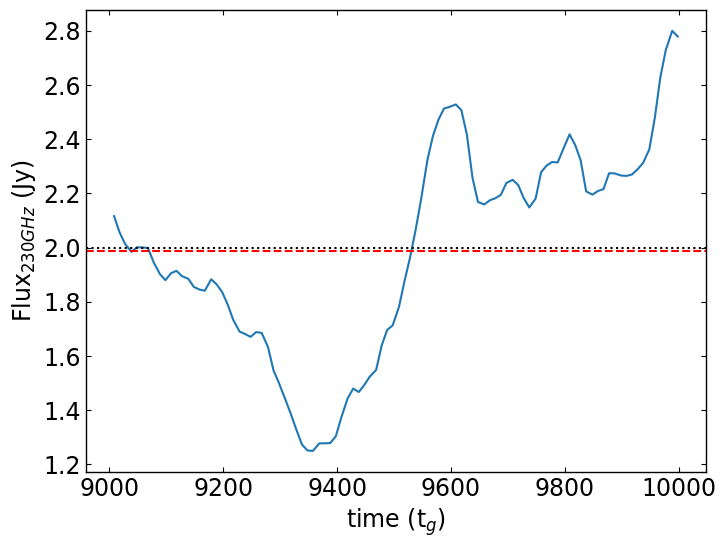

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [36]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.115884 Jy at 9008.139053
97:: 2.055605 Jy at 9017.844868
98:: 2.012919 Jy at 9027.551100
99:: 1.984187 Jy at 9038.646851
100:: 2.001124 Jy at 9048.356431
101:: 2.000451 Jy at 9058.061637
102:: 1.998371 Jy at 9067.764826
103:: 1.946376 Jy at 9077.464542
104:: 1.902561 Jy at 9088.552963
105:: 1.879725 Jy at 9098.254801
106:: 1.904939 Jy at 9107.957635
107:: 1.914333 Jy at 9117.659184
108:: 1.894572 Jy at 9127.363548
109:: 1.884867 Jy at 9138.452062
110:: 1.855043 Jy at 9148.158890
111:: 1.845338 Jy at 9157.868704
112:: 1.840830 Jy at 9167.579583
113:: 1.882832 Jy at 9178.672003
114:: 1.864364 Jy at 9188.377169
115:: 1.835492 Jy at 9198.079088
116:: 1.789550 Jy at 9207.781556
117:: 1.733233 Jy at 9217.482565
118:: 1.690032 Jy at 9228.573654
119:: 1.681074 Jy at 9238.281441
120:: 1.670573 Jy at 9247.990304
121:: 1.688319 Jy at 9257.698128
122:: 1.685186 Jy at 9267.401850
123:: 1.633434 Jy at 9278.487308
124:: 1.547401 Jy at 9288.189770
125:: 1.499590 Jy at 9297.894634
126:: 1.447080

In [55]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc70/BHOSS_CODE
96, flux: 2.194935 at 9008.139053
97, flux: 2.124862 at 9017.844868
98, flux: 2.054077 at 9027.551100
99, flux: 2.027479 at 9038.646851
100, flux: 2.066958 at 9048.356431
101, flux: 2.087963 at 9058.061637
102, flux: 2.090932 at 9067.764826
103, flux: 2.036382 at 9077.464542
104, flux: 2.045807 at 9088.552963
105, flux: 2.007392 at 9098.254801
106, flux: 2.045761 at 9107.957635
107, flux: 2.089078 at 9117.659184
108, flux: 2.058663 at 9127.363548
109, flux: 1.968321 at 9138.452062
110, flux: 1.924825 at 9148.158890
111, flux: 1.948801 at 9157.868704
112, flux: 1.947188 at 9167.579583
113, flux: 1.959553 at 9178.672003
114, flux: 1.957099 at 9188.377169
115, flux: 1.933315 at 9198.079088
116, flux: 1.863772 at 9207.781556
117, flux: 1.810724 at 9217.482565
118, flux: 1.809094 at 9228.573654
119, flux: 1.833285 at 9238.281441
120, flux: 1.838143 at 9247.990304
121, flux: 1.930282 at 9257.698128
122, flux:

In [56]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [57]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.028845 Jy, the density scale = 6.750000e-19


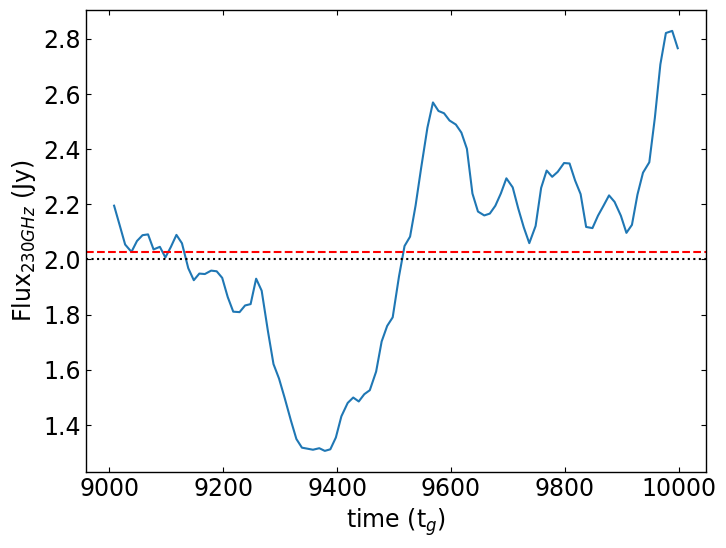

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [59]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.194935 Jy at 9008.139053
97:: 2.124862 Jy at 9017.844868
98:: 2.054077 Jy at 9027.551100
99:: 2.027479 Jy at 9038.646851
100:: 2.066958 Jy at 9048.356431
101:: 2.087963 Jy at 9058.061637
102:: 2.090932 Jy at 9067.764826
103:: 2.036382 Jy at 9077.464542
104:: 2.045807 Jy at 9088.552963
105:: 2.007392 Jy at 9098.254801
106:: 2.045761 Jy at 9107.957635
107:: 2.089078 Jy at 9117.659184
108:: 2.058663 Jy at 9127.363548
109:: 1.968321 Jy at 9138.452062
110:: 1.924825 Jy at 9148.158890
111:: 1.948801 Jy at 9157.868704
112:: 1.947188 Jy at 9167.579583
113:: 1.959553 Jy at 9178.672003
114:: 1.957099 Jy at 9188.377169
115:: 1.933315 Jy at 9198.079088
116:: 1.863772 Jy at 9207.781556
117:: 1.810724 Jy at 9217.482565
118:: 1.809094 Jy at 9228.573654
119:: 1.833285 Jy at 9238.281441
120:: 1.838143 Jy at 9247.990304
121:: 1.930282 Jy at 9257.698128
122:: 1.886764 Jy at 9267.401850
123:: 1.739147 Jy at 9278.487308
124:: 1.620732 Jy at 9288.189770
125:: 1.568261 Jy at 9297.894634
126:: 1.499589

In [60]:
ind,time,z_tot,dscale = bhoss_avg(5, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc90/BHOSS_CODE
96, flux: 2.127970 at 9008.139053
97, flux: 2.091930 at 9017.844868
98, flux: 2.044587 at 9027.551100
99, flux: 2.024392 at 9038.646851
100, flux: 2.078480 at 9048.356431
101, flux: 2.026633 at 9058.061637
102, flux: 2.035143 at 9067.764826
103, flux: 1.976841 at 9077.464542
104, flux: 1.978159 at 9088.552963
105, flux: 1.946112 at 9098.254801
106, flux: 2.019868 at 9107.957635
107, flux: 2.076824 at 9117.659184
108, flux: 2.010770 at 9127.363548
109, flux: 1.968742 at 9138.452062
110, flux: 1.922716 at 9148.158890
111, flux: 1.952371 at 9157.868704
112, flux: 1.952254 at 9167.579583
113, flux: 1.966263 at 9178.672003
114, flux: 1.918228 at 9188.377169
115, flux: 1.915749 at 9198.079088
116, flux: 1.874503 at 9207.781556
117, flux: 1.820529 at 9217.482565
118, flux: 1.822716 at 9228.573654
119, flux: 1.864552 at 9238.281441
120, flux: 1.853016 at 9247.990304
121, flux: 1.856585 at 9257.698128
122, flux:

In [61]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [62]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh5/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.989776 Jy, the density scale = 6.350000e-19


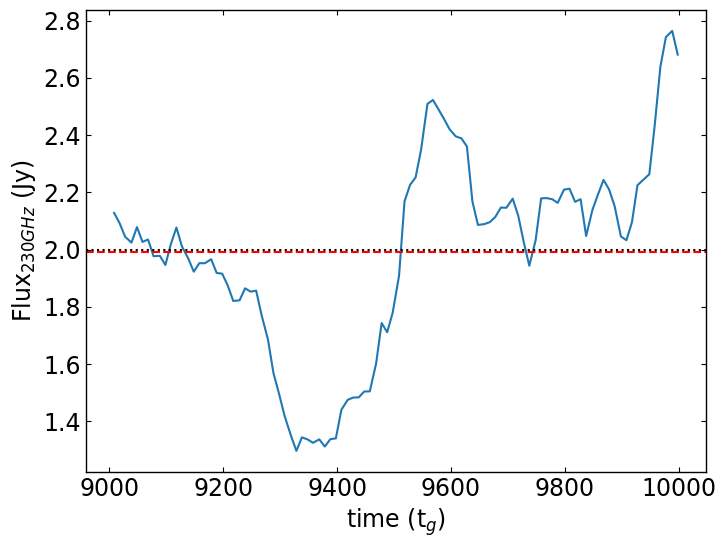

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [64]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.127970 Jy at 9008.139053
97:: 2.091930 Jy at 9017.844868
98:: 2.044587 Jy at 9027.551100
99:: 2.024392 Jy at 9038.646851
100:: 2.078480 Jy at 9048.356431
101:: 2.026633 Jy at 9058.061637
102:: 2.035143 Jy at 9067.764826
103:: 1.976841 Jy at 9077.464542
104:: 1.978159 Jy at 9088.552963
105:: 1.946112 Jy at 9098.254801
106:: 2.019868 Jy at 9107.957635
107:: 2.076824 Jy at 9117.659184
108:: 2.010770 Jy at 9127.363548
109:: 1.968742 Jy at 9138.452062
110:: 1.922716 Jy at 9148.158890
111:: 1.952371 Jy at 9157.868704
112:: 1.952254 Jy at 9167.579583
113:: 1.966263 Jy at 9178.672003
114:: 1.918228 Jy at 9188.377169
115:: 1.915749 Jy at 9198.079088
116:: 1.874503 Jy at 9207.781556
117:: 1.820529 Jy at 9217.482565
118:: 1.822716 Jy at 9228.573654
119:: 1.864552 Jy at 9238.281441
120:: 1.853016 Jy at 9247.990304
121:: 1.856585 Jy at 9257.698128
122:: 1.769926 Jy at 9267.401850
123:: 1.685520 Jy at 9278.487308
124:: 1.568023 Jy at 9288.189770
125:: 1.496553 Jy at 9297.894634
126:: 1.419599

## Rhigh=10

In [22]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc10/BHOSS_CODE
96, flux: 2.140353 at 9008.139053
97, flux: 2.086585 at 9017.844868
98, flux: 2.046200 at 9027.551100
99, flux: 2.034703 at 9038.646851
100, flux: 2.043992 at 9048.356431
101, flux: 2.036155 at 9058.061637
102, flux: 2.040046 at 9067.764826
103, flux: 2.021031 at 9077.464542
104, flux: 1.974962 at 9088.552963
105, flux: 1.923684 at 9098.254801
106, flux: 1.913340 at 9107.957635
107, flux: 1.917429 at 9117.659184
108, flux: 1.886378 at 9127.363548
109, flux: 1.875312 at 9138.452062
110, flux: 1.869643 at 9148.158890
111, flux: 1.872248 at 9157.868704
112, flux: 1.857219 at 9167.579583
113, flux: 1.848156 at 9178.672003
114, flux: 1.876099 at 9188.377169
115, flux: 1.911864 at 9198.079088
116, flux: 1.902446 at 9207.781556
117, flux: 1.855349 at 9217.482565
118, flux: 1.782592 at 9228.573654
119, flux: 1.767213 at 9238.281441
120, flux: 1.763647 at 9247.990304
121, flux: 1.752260 at 9257.698128
122, flux

In [23]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [24]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.019344 Jy, the density scale = 1.000000e-18


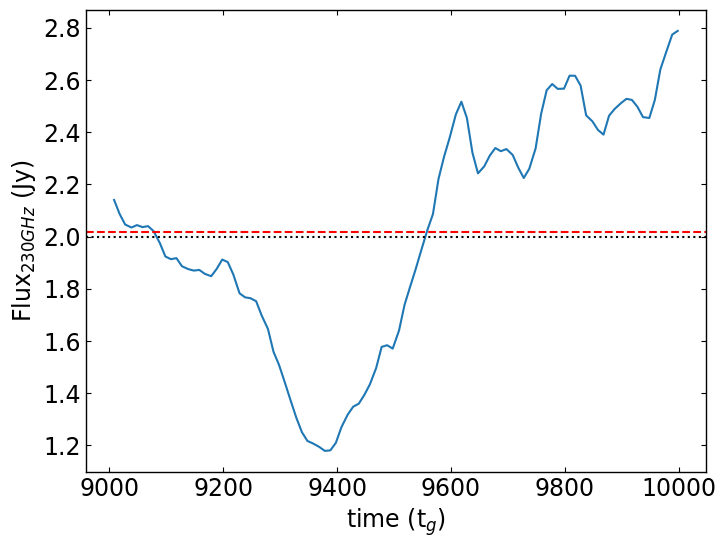

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [26]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.140353 Jy at 9008.139053
97:: 2.086585 Jy at 9017.844868
98:: 2.046200 Jy at 9027.551100
99:: 2.034703 Jy at 9038.646851
100:: 2.043992 Jy at 9048.356431
101:: 2.036155 Jy at 9058.061637
102:: 2.040046 Jy at 9067.764826
103:: 2.021031 Jy at 9077.464542
104:: 1.974962 Jy at 9088.552963
105:: 1.923684 Jy at 9098.254801
106:: 1.913340 Jy at 9107.957635
107:: 1.917429 Jy at 9117.659184
108:: 1.886378 Jy at 9127.363548
109:: 1.875312 Jy at 9138.452062
110:: 1.869643 Jy at 9148.158890
111:: 1.872248 Jy at 9157.868704
112:: 1.857219 Jy at 9167.579583
113:: 1.848156 Jy at 9178.672003
114:: 1.876099 Jy at 9188.377169
115:: 1.911864 Jy at 9198.079088
116:: 1.902446 Jy at 9207.781556
117:: 1.855349 Jy at 9217.482565
118:: 1.782592 Jy at 9228.573654
119:: 1.767213 Jy at 9238.281441
120:: 1.763647 Jy at 9247.990304
121:: 1.752260 Jy at 9257.698128
122:: 1.697680 Jy at 9267.401850
123:: 1.645896 Jy at 9278.487308
124:: 1.558740 Jy at 9288.189770
125:: 1.508403 Jy at 9297.894634
126:: 1.444595

In [27]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc30/BHOSS_CODE
96, flux: 2.181227 at 9008.139053
97, flux: 2.132065 at 9017.844868
98, flux: 2.090974 at 9027.551100
99, flux: 2.068037 at 9038.646851
100, flux: 2.078481 at 9048.356431
101, flux: 2.065438 at 9058.061637
102, flux: 2.066855 at 9067.764826
103, flux: 2.033961 at 9077.464542
104, flux: 1.993699 at 9088.552963
105, flux: 1.945498 at 9098.254801
106, flux: 1.946189 at 9107.957635
107, flux: 1.961303 at 9117.659184
108, flux: 1.939894 at 9127.363548
109, flux: 1.925785 at 9138.452062
110, flux: 1.914223 at 9148.158890
111, flux: 1.898841 at 9157.868704
112, flux: 1.880132 at 9167.579583
113, flux: 1.885892 at 9178.672003
114, flux: 1.923078 at 9188.377169
115, flux: 1.932783 at 9198.079088
116, flux: 1.912895 at 9207.781556
117, flux: 1.862545 at 9217.482565
118, flux: 1.790788 at 9228.573654
119, flux: 1.773434 at 9238.281441
120, flux: 1.769118 at 9247.990304
121, flux: 1.764401 at 9257.698128
122, flux

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.981850 Jy, the density scale = 9.700000e-19


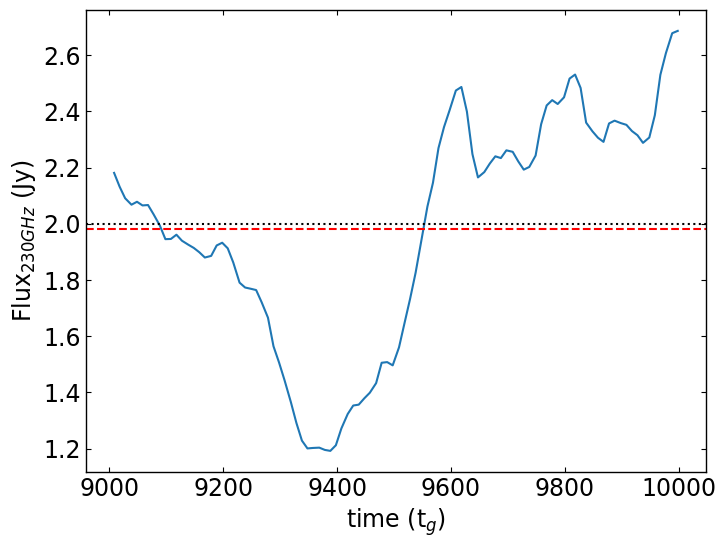

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.181227 Jy at 9008.139053
97:: 2.132065 Jy at 9017.844868
98:: 2.090974 Jy at 9027.551100
99:: 2.068037 Jy at 9038.646851
100:: 2.078481 Jy at 9048.356431
101:: 2.065438 Jy at 9058.061637
102:: 2.066855 Jy at 9067.764826
103:: 2.033961 Jy at 9077.464542
104:: 1.993699 Jy at 9088.552963
105:: 1.945498 Jy at 9098.254801
106:: 1.946189 Jy at 9107.957635
107:: 1.961303 Jy at 9117.659184
108:: 1.939894 Jy at 9127.363548
109:: 1.925785 Jy at 9138.452062
110:: 1.914223 Jy at 9148.158890
111:: 1.898841 Jy at 9157.868704
112:: 1.880132 Jy at 9167.579583
113:: 1.885892 Jy at 9178.672003
114:: 1.923078 Jy at 9188.377169
115:: 1.932783 Jy at 9198.079088
116:: 1.912895 Jy at 9207.781556
117:: 1.862545 Jy at 9217.482565
118:: 1.790788 Jy at 9228.573654
119:: 1.773434 Jy at 9238.281441
120:: 1.769118 Jy at 9247.990304
121:: 1.764401 Jy at 9257.698128
122:: 1.720888 Jy at 9267.401850
123:: 1.666042 Jy at 9278.487308
124:: 1.564363 Jy at 9288.189770
125:: 1.506978 Jy at 9297.894634
126:: 1.443559

In [32]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc50/BHOSS_CODE
96, flux: 2.230806 at 9008.139053
97, flux: 2.182254 at 9017.844868
98, flux: 2.122563 at 9027.551100
99, flux: 2.083526 at 9038.646851
100, flux: 2.098755 at 9048.356431
101, flux: 2.085456 at 9058.061637
102, flux: 2.084483 at 9067.764826
103, flux: 2.055060 at 9077.464542
104, flux: 2.039086 at 9088.552963
105, flux: 2.006883 at 9098.254801
106, flux: 2.035158 at 9107.957635
107, flux: 2.061265 at 9117.659184
108, flux: 2.046561 at 9127.363548
109, flux: 2.040421 at 9138.452062
110, flux: 1.992925 at 9148.158890
111, flux: 1.946064 at 9157.868704
112, flux: 1.928652 at 9167.579583
113, flux: 1.984676 at 9178.672003
114, flux: 1.986081 at 9188.377169
115, flux: 1.964654 at 9198.079088
116, flux: 1.931998 at 9207.781556
117, flux: 1.877258 at 9217.482565
118, flux: 1.805888 at 9228.573654
119, flux: 1.798643 at 9238.281441
120, flux: 1.800084 at 9247.990304
121, flux: 1.821633 at 9257.698128
122, flux

In [33]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [34]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.956341 Jy, the density scale = 9.150000e-19


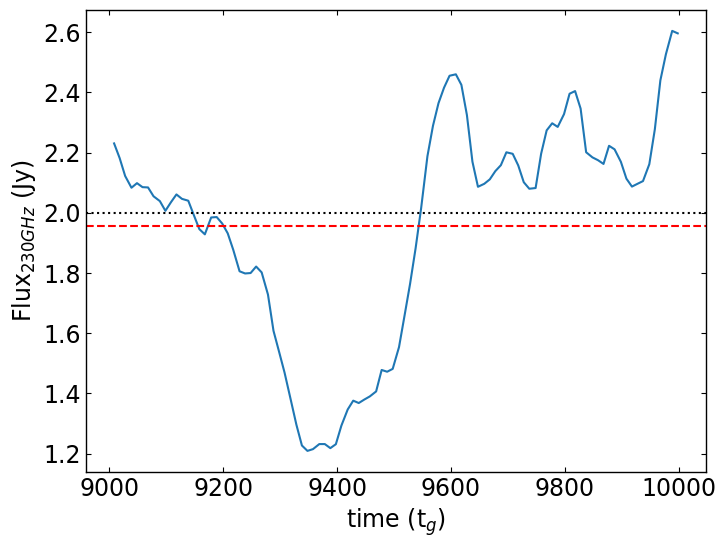

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [36]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.230806 Jy at 9008.139053
97:: 2.182254 Jy at 9017.844868
98:: 2.122563 Jy at 9027.551100
99:: 2.083526 Jy at 9038.646851
100:: 2.098755 Jy at 9048.356431
101:: 2.085456 Jy at 9058.061637
102:: 2.084483 Jy at 9067.764826
103:: 2.055060 Jy at 9077.464542
104:: 2.039086 Jy at 9088.552963
105:: 2.006883 Jy at 9098.254801
106:: 2.035158 Jy at 9107.957635
107:: 2.061265 Jy at 9117.659184
108:: 2.046561 Jy at 9127.363548
109:: 2.040421 Jy at 9138.452062
110:: 1.992925 Jy at 9148.158890
111:: 1.946064 Jy at 9157.868704
112:: 1.928652 Jy at 9167.579583
113:: 1.984676 Jy at 9178.672003
114:: 1.986081 Jy at 9188.377169
115:: 1.964654 Jy at 9198.079088
116:: 1.931998 Jy at 9207.781556
117:: 1.877258 Jy at 9217.482565
118:: 1.805888 Jy at 9228.573654
119:: 1.798643 Jy at 9238.281441
120:: 1.800084 Jy at 9247.990304
121:: 1.821633 Jy at 9257.698128
122:: 1.802193 Jy at 9267.401850
123:: 1.728467 Jy at 9278.487308
124:: 1.608081 Jy at 9288.189770
125:: 1.539240 Jy at 9297.894634
126:: 1.469413

In [51]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc70/BHOSS_CODE
96, flux: 2.327002 at 9008.139053
97, flux: 2.258247 at 9017.844868
98, flux: 2.167034 at 9027.551100
99, flux: 2.127705 at 9038.646851
100, flux: 2.168578 at 9048.356431
101, flux: 2.164811 at 9058.061637
102, flux: 2.170934 at 9067.764826
103, flux: 2.152336 at 9077.464542
104, flux: 2.198977 at 9088.552963
105, flux: 2.161504 at 9098.254801
106, flux: 2.198546 at 9107.957635
107, flux: 2.254799 at 9117.659184
108, flux: 2.227462 at 9127.363548
109, flux: 2.155788 at 9138.452062
110, flux: 2.084478 at 9148.158890
111, flux: 2.072003 at 9157.868704
112, flux: 2.049261 at 9167.579583
113, flux: 2.075432 at 9178.672003
114, flux: 2.087254 at 9188.377169
115, flux: 2.066144 at 9198.079088
116, flux: 2.018227 at 9207.781556
117, flux: 1.977472 at 9217.482565
118, flux: 1.955677 at 9228.573654
119, flux: 1.967101 at 9238.281441
120, flux: 1.994521 at 9247.990304
121, flux: 2.093695 at 9257.698128
122, flux

In [52]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [53]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.998790 Jy, the density scale = 8.700000e-19


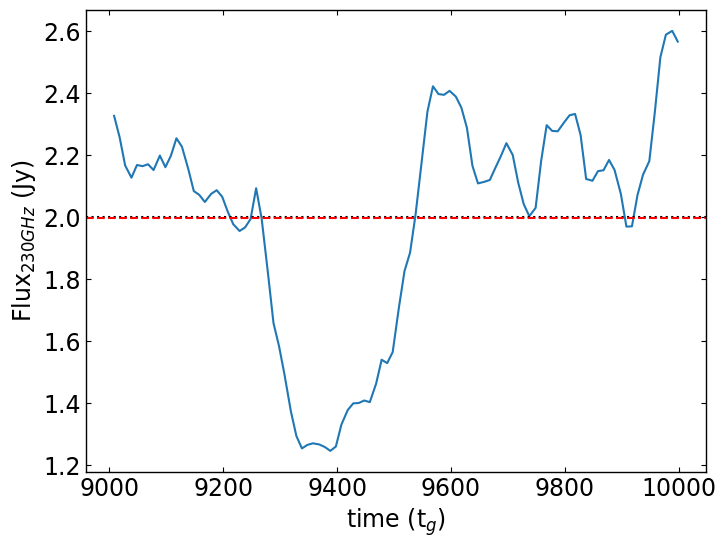

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [55]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.327002 Jy at 9008.139053
97:: 2.258247 Jy at 9017.844868
98:: 2.167034 Jy at 9027.551100
99:: 2.127705 Jy at 9038.646851
100:: 2.168578 Jy at 9048.356431
101:: 2.164811 Jy at 9058.061637
102:: 2.170934 Jy at 9067.764826
103:: 2.152336 Jy at 9077.464542
104:: 2.198977 Jy at 9088.552963
105:: 2.161504 Jy at 9098.254801
106:: 2.198546 Jy at 9107.957635
107:: 2.254799 Jy at 9117.659184
108:: 2.227462 Jy at 9127.363548
109:: 2.155788 Jy at 9138.452062
110:: 2.084478 Jy at 9148.158890
111:: 2.072003 Jy at 9157.868704
112:: 2.049261 Jy at 9167.579583
113:: 2.075432 Jy at 9178.672003
114:: 2.087254 Jy at 9188.377169
115:: 2.066144 Jy at 9198.079088
116:: 2.018227 Jy at 9207.781556
117:: 1.977472 Jy at 9217.482565
118:: 1.955677 Jy at 9228.573654
119:: 1.967101 Jy at 9238.281441
120:: 1.994521 Jy at 9247.990304
121:: 2.093695 Jy at 9257.698128
122:: 1.995325 Jy at 9267.401850
123:: 1.819110 Jy at 9278.487308
124:: 1.658456 Jy at 9288.189770
125:: 1.584314 Jy at 9297.894634
126:: 1.491380

In [56]:
ind,time,z_tot,dscale = bhoss_avg(10, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc90/BHOSS_CODE
96, flux: 2.342054 at 9008.139053
97, flux: 2.278230 at 9017.844868
98, flux: 2.199369 at 9027.551100
99, flux: 2.164550 at 9038.646851
100, flux: 2.203801 at 9048.356431
101, flux: 2.128655 at 9058.061637
102, flux: 2.135335 at 9067.764826
103, flux: 2.112439 at 9077.464542
104, flux: 2.171201 at 9088.552963
105, flux: 2.118343 at 9098.254801
106, flux: 2.208132 at 9107.957635
107, flux: 2.282349 at 9117.659184
108, flux: 2.218687 at 9127.363548
109, flux: 2.184776 at 9138.452062
110, flux: 2.109711 at 9148.158890
111, flux: 2.116347 at 9157.868704
112, flux: 2.090167 at 9167.579583
113, flux: 2.132739 at 9178.672003
114, flux: 2.098376 at 9188.377169
115, flux: 2.114828 at 9198.079088
116, flux: 2.086531 at 9207.781556
117, flux: 2.026816 at 9217.482565
118, flux: 1.974192 at 9228.573654
119, flux: 2.003689 at 9238.281441
120, flux: 2.027155 at 9247.990304
121, flux: 2.035411 at 9257.698128
122, flux

In [57]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [58]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.997706 Jy, the density scale = 8.350000e-19


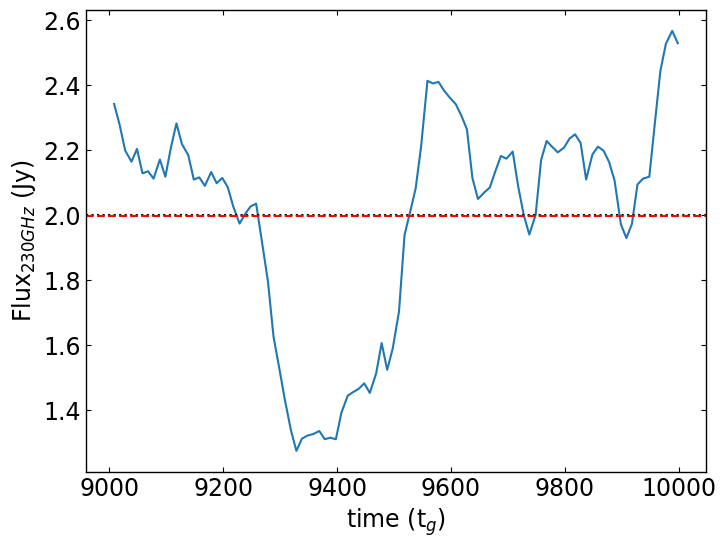

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [60]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.342054 Jy at 9008.139053
97:: 2.278230 Jy at 9017.844868
98:: 2.199369 Jy at 9027.551100
99:: 2.164550 Jy at 9038.646851
100:: 2.203801 Jy at 9048.356431
101:: 2.128655 Jy at 9058.061637
102:: 2.135335 Jy at 9067.764826
103:: 2.112439 Jy at 9077.464542
104:: 2.171201 Jy at 9088.552963
105:: 2.118343 Jy at 9098.254801
106:: 2.208132 Jy at 9107.957635
107:: 2.282349 Jy at 9117.659184
108:: 2.218687 Jy at 9127.363548
109:: 2.184776 Jy at 9138.452062
110:: 2.109711 Jy at 9148.158890
111:: 2.116347 Jy at 9157.868704
112:: 2.090167 Jy at 9167.579583
113:: 2.132739 Jy at 9178.672003
114:: 2.098376 Jy at 9188.377169
115:: 2.114828 Jy at 9198.079088
116:: 2.086531 Jy at 9207.781556
117:: 2.026816 Jy at 9217.482565
118:: 1.974192 Jy at 9228.573654
119:: 2.003689 Jy at 9238.281441
120:: 2.027155 Jy at 9247.990304
121:: 2.035411 Jy at 9257.698128
122:: 1.924271 Jy at 9267.401850
123:: 1.795794 Jy at 9278.487308
124:: 1.626961 Jy at 9288.189770
125:: 1.533479 Jy at 9297.894634
126:: 1.437553

## Rhigh=20

In [2]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc10/BHOSS_CODE
96, flux: 2.158457 at 9008.139053
97, flux: 2.142177 at 9017.844868
98, flux: 2.104538 at 9027.551100
99, flux: 2.082417 at 9038.646851
100, flux: 2.081255 at 9048.356431
101, flux: 2.059931 at 9058.061637
102, flux: 2.050226 at 9067.764826
103, flux: 2.040857 at 9077.464542
104, flux: 2.037421 at 9088.552963
105, flux: 1.975751 at 9098.254801
106, flux: 1.955619 at 9107.957635
107, flux: 1.968913 at 9117.659184
108, flux: 1.938017 at 9127.363548
109, flux: 1.920688 at 9138.452062
110, flux: 1.907996 at 9148.158890
111, flux: 1.887538 at 9157.868704
112, flux: 1.858585 at 9167.579583
113, flux: 1.841931 at 9178.672003
114, flux: 1.871311 at 9188.377169
115, flux: 1.927138 at 9198.079088
116, flux: 1.960082 at 9207.781556
117, flux: 1.929105 at 9217.482565
118, flux: 1.859878 at 9228.573654
119, flux: 1.852947 at 9238.281441
120, flux: 1.858063 at 9247.990304
121, flux: 1.847363 at 9257.698128
122, flux

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.972753 Jy, the density scale = 1.290000e-18


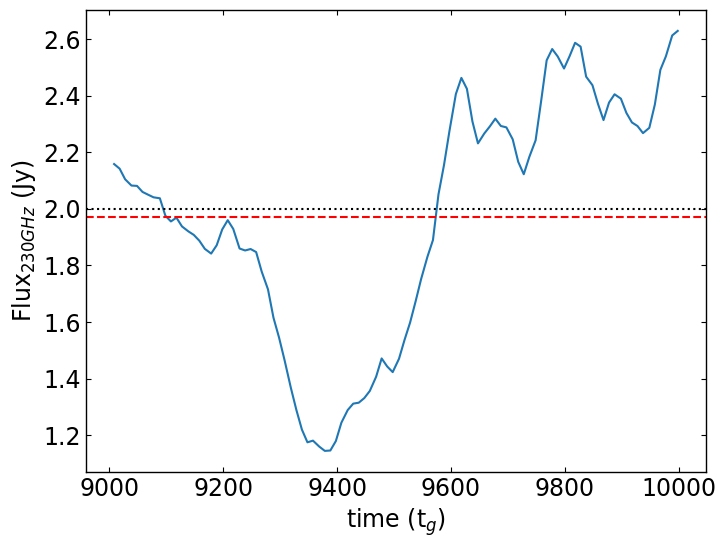

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.158457 Jy at 9008.139053
97:: 2.142177 Jy at 9017.844868
98:: 2.104538 Jy at 9027.551100
99:: 2.082417 Jy at 9038.646851
100:: 2.081255 Jy at 9048.356431
101:: 2.059931 Jy at 9058.061637
102:: 2.050226 Jy at 9067.764826
103:: 2.040857 Jy at 9077.464542
104:: 2.037421 Jy at 9088.552963
105:: 1.975751 Jy at 9098.254801
106:: 1.955619 Jy at 9107.957635
107:: 1.968913 Jy at 9117.659184
108:: 1.938017 Jy at 9127.363548
109:: 1.920688 Jy at 9138.452062
110:: 1.907996 Jy at 9148.158890
111:: 1.887538 Jy at 9157.868704
112:: 1.858585 Jy at 9167.579583
113:: 1.841931 Jy at 9178.672003
114:: 1.871311 Jy at 9188.377169
115:: 1.927138 Jy at 9198.079088
116:: 1.960082 Jy at 9207.781556
117:: 1.929105 Jy at 9217.482565
118:: 1.859878 Jy at 9228.573654
119:: 1.852947 Jy at 9238.281441
120:: 1.858063 Jy at 9247.990304
121:: 1.847363 Jy at 9257.698128
122:: 1.778669 Jy at 9267.401850
123:: 1.715608 Jy at 9278.487308
124:: 1.614948 Jy at 9288.189770
125:: 1.545479 Jy at 9297.894634
126:: 1.465379

In [22]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc30/BHOSS_CODE
96, flux: 2.225557 at 9008.139053
97, flux: 2.212769 at 9017.844868
98, flux: 2.174428 at 9027.551100
99, flux: 2.140306 at 9038.646851
100, flux: 2.140652 at 9048.356431
101, flux: 2.113734 at 9058.061637
102, flux: 2.100394 at 9067.764826
103, flux: 2.081355 at 9077.464542
104, flux: 2.085467 at 9088.552963
105, flux: 2.026876 at 9098.254801
106, flux: 2.015660 at 9107.957635
107, flux: 2.038046 at 9117.659184
108, flux: 2.016261 at 9127.363548
109, flux: 2.003073 at 9138.452062
110, flux: 1.987060 at 9148.158890
111, flux: 1.946722 at 9157.868704
112, flux: 1.917005 at 9167.579583
113, flux: 1.920192 at 9178.672003
114, flux: 1.972771 at 9188.377169
115, flux: 1.992278 at 9198.079088
116, flux: 2.008489 at 9207.781556
117, flux: 1.970281 at 9217.482565
118, flux: 1.903538 at 9228.573654
119, flux: 1.893993 at 9238.281441
120, flux: 1.896466 at 9247.990304
121, flux: 1.893115 at 9257.698128
122, flux

In [23]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [24]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.952819 Jy, the density scale = 1.260000e-18


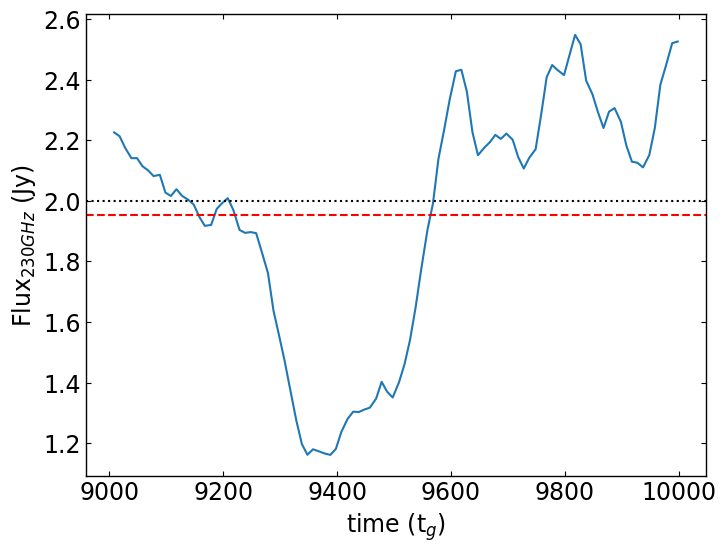

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [26]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.225557 Jy at 9008.139053
97:: 2.212769 Jy at 9017.844868
98:: 2.174428 Jy at 9027.551100
99:: 2.140306 Jy at 9038.646851
100:: 2.140652 Jy at 9048.356431
101:: 2.113734 Jy at 9058.061637
102:: 2.100394 Jy at 9067.764826
103:: 2.081355 Jy at 9077.464542
104:: 2.085467 Jy at 9088.552963
105:: 2.026876 Jy at 9098.254801
106:: 2.015660 Jy at 9107.957635
107:: 2.038046 Jy at 9117.659184
108:: 2.016261 Jy at 9127.363548
109:: 2.003073 Jy at 9138.452062
110:: 1.987060 Jy at 9148.158890
111:: 1.946722 Jy at 9157.868704
112:: 1.917005 Jy at 9167.579583
113:: 1.920192 Jy at 9178.672003
114:: 1.972771 Jy at 9188.377169
115:: 1.992278 Jy at 9198.079088
116:: 2.008489 Jy at 9207.781556
117:: 1.970281 Jy at 9217.482565
118:: 1.903538 Jy at 9228.573654
119:: 1.893993 Jy at 9238.281441
120:: 1.896466 Jy at 9247.990304
121:: 1.893115 Jy at 9257.698128
122:: 1.832379 Jy at 9267.401850
123:: 1.761092 Jy at 9278.487308
124:: 1.637332 Jy at 9288.189770
125:: 1.555940 Jy at 9297.894634
126:: 1.472749

In [27]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc50/BHOSS_CODE
96, flux: 2.270953 at 9008.139053
97, flux: 2.247633 at 9017.844868
98, flux: 2.185862 at 9027.551100
99, flux: 2.137860 at 9038.646851
100, flux: 2.142027 at 9048.356431
101, flux: 2.116240 at 9058.061637
102, flux: 2.104137 at 9067.764826
103, flux: 2.095358 at 9077.464542
104, flux: 2.128588 at 9088.552963
105, flux: 2.092200 at 9098.254801
106, flux: 2.101687 at 9107.957635
107, flux: 2.127806 at 9117.659184
108, flux: 2.116079 at 9127.363548
109, flux: 2.112195 at 9138.452062
110, flux: 2.068057 at 9148.158890
111, flux: 1.992012 at 9157.868704
112, flux: 1.967555 at 9167.579583
113, flux: 2.020515 at 9178.672003
114, flux: 2.042772 at 9188.377169
115, flux: 2.019345 at 9198.079088
116, flux: 2.015585 at 9207.781556
117, flux: 1.974715 at 9217.482565
118, flux: 1.911696 at 9228.573654
119, flux: 1.911802 at 9238.281441
120, flux: 1.926413 at 9247.990304
121, flux: 1.950447 at 9257.698128
122, flux

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.918173 Jy, the density scale = 1.190000e-18


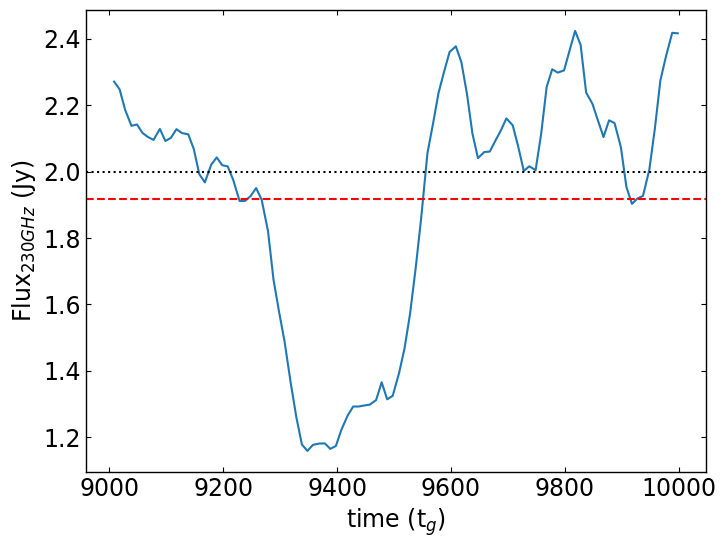

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [31]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.270953 Jy at 9008.139053
97:: 2.247633 Jy at 9017.844868
98:: 2.185862 Jy at 9027.551100
99:: 2.137860 Jy at 9038.646851
100:: 2.142027 Jy at 9048.356431
101:: 2.116240 Jy at 9058.061637
102:: 2.104137 Jy at 9067.764826
103:: 2.095358 Jy at 9077.464542
104:: 2.128588 Jy at 9088.552963
105:: 2.092200 Jy at 9098.254801
106:: 2.101687 Jy at 9107.957635
107:: 2.127806 Jy at 9117.659184
108:: 2.116079 Jy at 9127.363548
109:: 2.112195 Jy at 9138.452062
110:: 2.068057 Jy at 9148.158890
111:: 1.992012 Jy at 9157.868704
112:: 1.967555 Jy at 9167.579583
113:: 2.020515 Jy at 9178.672003
114:: 2.042772 Jy at 9188.377169
115:: 2.019345 Jy at 9198.079088
116:: 2.015585 Jy at 9207.781556
117:: 1.974715 Jy at 9217.482565
118:: 1.911696 Jy at 9228.573654
119:: 1.911802 Jy at 9238.281441
120:: 1.926413 Jy at 9247.990304
121:: 1.950447 Jy at 9257.698128
122:: 1.915244 Jy at 9267.401850
123:: 1.821384 Jy at 9278.487308
124:: 1.675044 Jy at 9288.189770
125:: 1.578559 Jy at 9297.894634
126:: 1.488600

In [44]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc70/BHOSS_CODE
96, flux: 2.456075 at 9008.139053
97, flux: 2.400538 at 9017.844868
98, flux: 2.305061 at 9027.551100
99, flux: 2.253936 at 9038.646851
100, flux: 2.278058 at 9048.356431
101, flux: 2.247350 at 9058.061637
102, flux: 2.247368 at 9067.764826
103, flux: 2.260243 at 9077.464542
104, flux: 2.355826 at 9088.552963
105, flux: 2.330916 at 9098.254801
106, flux: 2.350325 at 9107.957635
107, flux: 2.392199 at 9117.659184
108, flux: 2.367366 at 9127.363548
109, flux: 2.334537 at 9138.452062
110, flux: 2.255705 at 9148.158890
111, flux: 2.213550 at 9157.868704
112, flux: 2.168241 at 9167.579583
113, flux: 2.190303 at 9178.672003
114, flux: 2.215159 at 9188.377169
115, flux: 2.191779 at 9198.079088
116, flux: 2.190381 at 9207.781556
117, flux: 2.170483 at 9217.482565
118, flux: 2.170620 at 9228.573654
119, flux: 2.170242 at 9238.281441
120, flux: 2.210378 at 9247.990304
121, flux: 2.311524 at 9257.698128
122, flux

In [45]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [46]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.027422 Jy, the density scale = 1.170000e-18


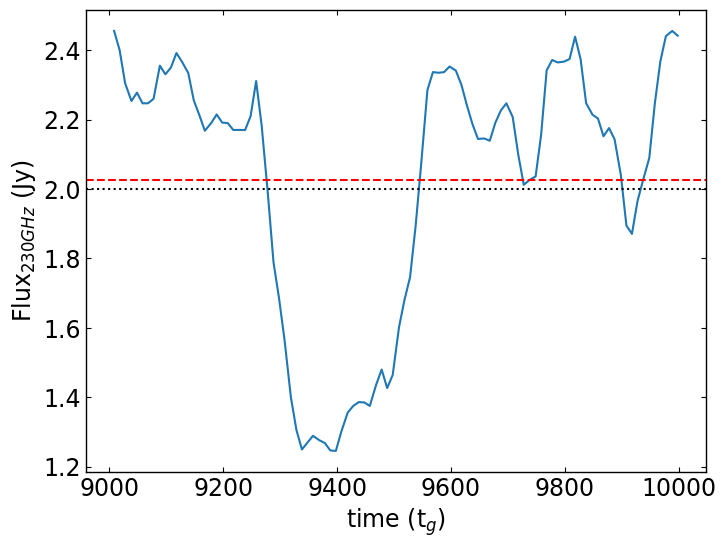

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [48]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.456075 Jy at 9008.139053
97:: 2.400538 Jy at 9017.844868
98:: 2.305061 Jy at 9027.551100
99:: 2.253936 Jy at 9038.646851
100:: 2.278058 Jy at 9048.356431
101:: 2.247350 Jy at 9058.061637
102:: 2.247368 Jy at 9067.764826
103:: 2.260243 Jy at 9077.464542
104:: 2.355826 Jy at 9088.552963
105:: 2.330916 Jy at 9098.254801
106:: 2.350325 Jy at 9107.957635
107:: 2.392199 Jy at 9117.659184
108:: 2.367366 Jy at 9127.363548
109:: 2.334537 Jy at 9138.452062
110:: 2.255705 Jy at 9148.158890
111:: 2.213550 Jy at 9157.868704
112:: 2.168241 Jy at 9167.579583
113:: 2.190303 Jy at 9178.672003
114:: 2.215159 Jy at 9188.377169
115:: 2.191779 Jy at 9198.079088
116:: 2.190381 Jy at 9207.781556
117:: 2.170483 Jy at 9217.482565
118:: 2.170620 Jy at 9228.573654
119:: 2.170242 Jy at 9238.281441
120:: 2.210378 Jy at 9247.990304
121:: 2.311524 Jy at 9257.698128
122:: 2.183046 Jy at 9267.401850
123:: 1.982990 Jy at 9278.487308
124:: 1.789111 Jy at 9288.189770
125:: 1.685888 Jy at 9297.894634
126:: 1.565154

In [49]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc90/BHOSS_CODE
96, flux: 2.529396 at 9008.139053
97, flux: 2.441261 at 9017.844868
98, flux: 2.345722 at 9027.551100
99, flux: 2.290613 at 9038.646851
100, flux: 2.296798 at 9048.356431
101, flux: 2.212206 at 9058.061637
102, flux: 2.206505 at 9067.764826
103, flux: 2.214489 at 9077.464542
104, flux: 2.317245 at 9088.552963
105, flux: 2.272729 at 9098.254801
106, flux: 2.348205 at 9107.957635
107, flux: 2.415644 at 9117.659184
108, flux: 2.378637 at 9127.363548
109, flux: 2.361436 at 9138.452062
110, flux: 2.273488 at 9148.158890
111, flux: 2.262147 at 9157.868704
112, flux: 2.207166 at 9167.579583
113, flux: 2.267635 at 9178.672003
114, flux: 2.239997 at 9188.377169
115, flux: 2.267437 at 9198.079088
116, flux: 2.295099 at 9207.781556
117, flux: 2.246039 at 9217.482565
118, flux: 2.178692 at 9228.573654
119, flux: 2.196746 at 9238.281441
120, flux: 2.235357 at 9247.990304
121, flux: 2.260451 at 9257.698128
122, flux

In [50]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [51]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh20/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.032652 Jy, the density scale = 1.140000e-18


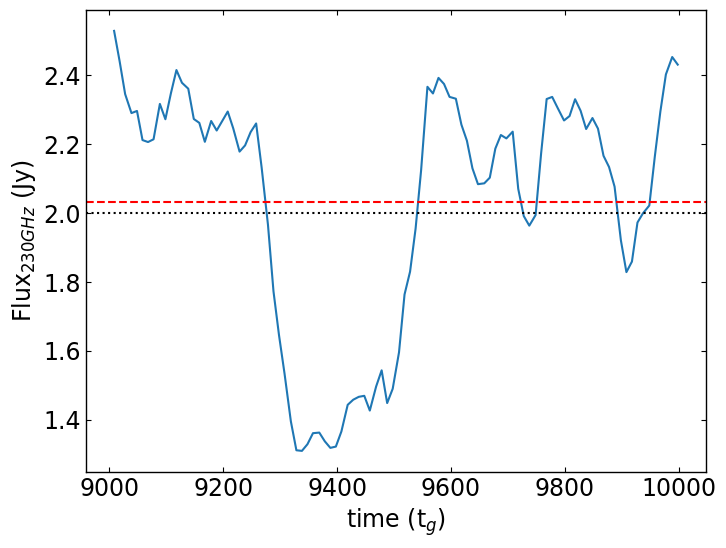

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [53]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.529396 Jy at 9008.139053
97:: 2.441261 Jy at 9017.844868
98:: 2.345722 Jy at 9027.551100
99:: 2.290613 Jy at 9038.646851
100:: 2.296798 Jy at 9048.356431
101:: 2.212206 Jy at 9058.061637
102:: 2.206505 Jy at 9067.764826
103:: 2.214489 Jy at 9077.464542
104:: 2.317245 Jy at 9088.552963
105:: 2.272729 Jy at 9098.254801
106:: 2.348205 Jy at 9107.957635
107:: 2.415644 Jy at 9117.659184
108:: 2.378637 Jy at 9127.363548
109:: 2.361436 Jy at 9138.452062
110:: 2.273488 Jy at 9148.158890
111:: 2.262147 Jy at 9157.868704
112:: 2.207166 Jy at 9167.579583
113:: 2.267635 Jy at 9178.672003
114:: 2.239997 Jy at 9188.377169
115:: 2.267437 Jy at 9198.079088
116:: 2.295099 Jy at 9207.781556
117:: 2.246039 Jy at 9217.482565
118:: 2.178692 Jy at 9228.573654
119:: 2.196746 Jy at 9238.281441
120:: 2.235357 Jy at 9247.990304
121:: 2.260451 Jy at 9257.698128
122:: 2.131821 Jy at 9267.401850
123:: 1.966017 Jy at 9278.487308
124:: 1.772546 Jy at 9288.189770
125:: 1.645246 Jy at 9297.894634
126:: 1.533677

## Rhigh=40

In [15]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 10, 0, "MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 2.178122 at 9008.139053
97, flux: 2.206067 at 9017.844868
98, flux: 2.188228 at 9027.551100
99, flux: 2.170067 at 9038.646851
100, flux: 2.162174 at 9048.356431
101, flux: 2.135188 at 9058.061637
102, flux: 2.105788 at 9067.764826
103, flux: 2.087025 at 9077.464542
104, flux: 2.123250 at 9088.552963
105, flux: 2.069971 at 9098.254801
106, flux: 2.037346 at 9107.957635
107, flux: 2.049667 at 9117.659184
108, flux: 2.017702 at 9127.363548
109, flux: 1.997376 at 9138.452062
110, flux: 1.989369 at 9148.158890
111, flux: 1.958960 at 9157.868704
112, flux: 1.913505 at 9167.579583
113, flux: 1.878108 at 9178.672003
114, flux: 1.892769 at 9188.377169
115, flux: 1.954342 at 9198.079088
116, flux: 2.028668 at 9207.781556
117, flux: 2.024022 at 9217.482565
118, flux: 1.998160 at 9228.573654
119, flux: 2.014129 at 9238.281441
120, flux: 2.036312 a

In [16]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [17]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.000898 Jy, the density scale = 1.720000e-18


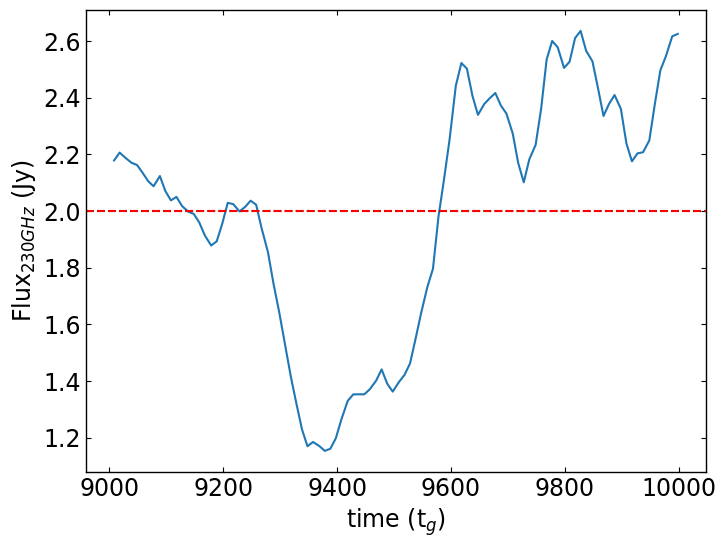

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [41]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc30/BHOSS_CODE
96, flux: 2.176307 at 9008.139053
97, flux: 2.203422 at 9017.844868
98, flux: 2.188248 at 9027.551100
99, flux: 2.161603 at 9038.646851
100, flux: 2.151492 at 9048.356431
101, flux: 2.123995 at 9058.061637
102, flux: 2.091662 at 9067.764826
103, flux: 2.069338 at 9077.464542
104, flux: 2.112280 at 9088.552963
105, flux: 2.064429 at 9098.254801
106, flux: 2.038124 at 9107.957635
107, flux: 2.057915 at 9117.659184
108, flux: 2.032989 at 9127.363548
109, flux: 2.021845 at 9138.452062
110, flux: 2.014874 at 9148.158890
111, flux: 1.964056 at 9157.868704
112, flux: 1.923030 at 9167.579583
113, flux: 1.907554 at 9178.672003
114, flux: 1.957950 at 9188.377169
115, flux: 1.976879 at 9198.079088
116, flux: 2.025634 at 9207.781556
117, flux: 2.009850 at 9217.482565
118, flux: 1.993252 at 9228.573654
119, flux: 2.008891 at 9238.281441
120, flux: 2.023462 at 9247.990304
121, flux: 2.015634 at 9257.698128
122, flux

In [42]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [43]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.916244 Jy, the density scale = 1.650000e-18


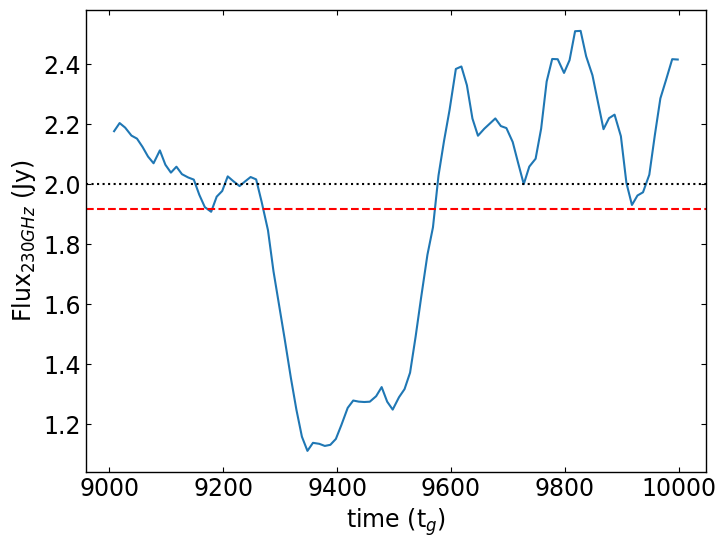

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [45]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.176307 Jy at 9008.139053
97:: 2.203422 Jy at 9017.844868
98:: 2.188248 Jy at 9027.551100
99:: 2.161603 Jy at 9038.646851
100:: 2.151492 Jy at 9048.356431
101:: 2.123995 Jy at 9058.061637
102:: 2.091662 Jy at 9067.764826
103:: 2.069338 Jy at 9077.464542
104:: 2.112280 Jy at 9088.552963
105:: 2.064429 Jy at 9098.254801
106:: 2.038124 Jy at 9107.957635
107:: 2.057915 Jy at 9117.659184
108:: 2.032989 Jy at 9127.363548
109:: 2.021845 Jy at 9138.452062
110:: 2.014874 Jy at 9148.158890
111:: 1.964056 Jy at 9157.868704
112:: 1.923030 Jy at 9167.579583
113:: 1.907554 Jy at 9178.672003
114:: 1.957950 Jy at 9188.377169
115:: 1.976879 Jy at 9198.079088
116:: 2.025634 Jy at 9207.781556
117:: 2.009850 Jy at 9217.482565
118:: 1.993252 Jy at 9228.573654
119:: 2.008891 Jy at 9238.281441
120:: 2.023462 Jy at 9247.990304
121:: 2.015634 Jy at 9257.698128
122:: 1.940286 Jy at 9267.401850
123:: 1.846143 Jy at 9278.487308
124:: 1.709021 Jy at 9288.189770
125:: 1.597674 Jy at 9297.894634
126:: 1.486222

In [19]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 50, 0, "MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 2.368337 at 9008.139053
97, flux: 2.373771 at 9017.844868
98, flux: 2.340135 at 9027.551100
99, flux: 2.300287 at 9038.646851
100, flux: 2.291687 at 9048.356431
101, flux: 2.268279 at 9058.061637
102, flux: 2.241839 at 9067.764826
103, flux: 2.229945 at 9077.464542
104, flux: 2.312250 at 9088.552963
105, flux: 2.291730 at 9098.254801
106, flux: 2.274954 at 9107.957635
107, flux: 2.293393 at 9117.659184
108, flux: 2.280421 at 9127.363548
109, flux: 2.272179 at 9138.452062
110, flux: 2.248356 at 9148.158890
111, flux: 2.155061 at 9157.868704
112, flux: 2.123433 at 9167.579583
113, flux: 2.150186 at 9178.672003
114, flux: 2.177441 at 9188.377169
115, flux: 2.135368 at 9198.079088
116, flux: 2.163100 at 9207.781556
117, flux: 2.150374 at 9217.482565
118, flux: 2.144306 at 9228.573654
119, flux: 2.174807 at 9238.281441
120, flux: 2.204990 a

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.009748 Jy, the density scale = 1.640000e-18


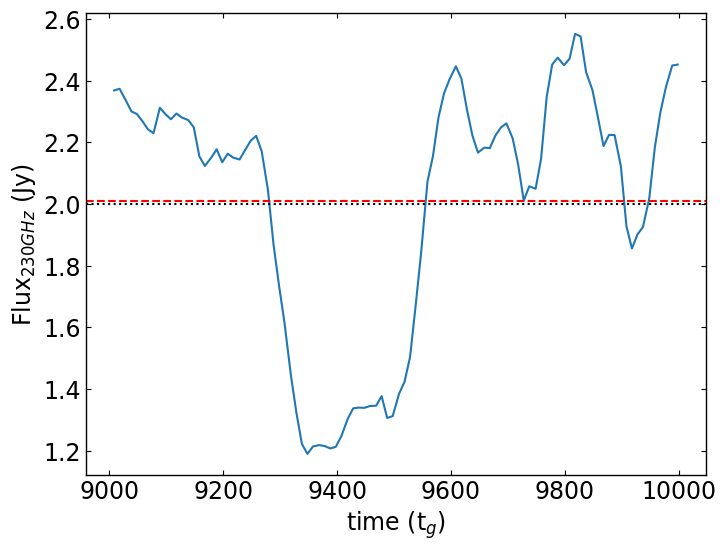

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [51]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc70/BHOSS_CODE
96, flux: 2.425588 at 9008.139053
97, flux: 2.397867 at 9017.844868
98, flux: 2.333341 at 9027.551100
99, flux: 2.291238 at 9038.646851
100, flux: 2.290802 at 9048.356431
101, flux: 2.257794 at 9058.061637
102, flux: 2.249071 at 9067.764826
103, flux: 2.261875 at 9077.464542
104, flux: 2.396812 at 9088.552963
105, flux: 2.398585 at 9098.254801
106, flux: 2.403507 at 9107.957635
107, flux: 2.425950 at 9117.659184
108, flux: 2.395731 at 9127.363548
109, flux: 2.387413 at 9138.452062
110, flux: 2.330845 at 9148.158890
111, flux: 2.273299 at 9157.868704
112, flux: 2.208533 at 9167.579583
113, flux: 2.190891 at 9178.672003
114, flux: 2.215676 at 9188.377169
115, flux: 2.182950 at 9198.079088
116, flux: 2.234317 at 9207.781556
117, flux: 2.244758 at 9217.482565
118, flux: 2.324178 at 9228.573654
119, flux: 2.351249 at 9238.281441
120, flux: 2.388340 at 9247.990304
121, flux: 2.472531 at 9257.698128
122, flux

In [52]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [53]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.015172 Jy, the density scale = 1.580000e-18


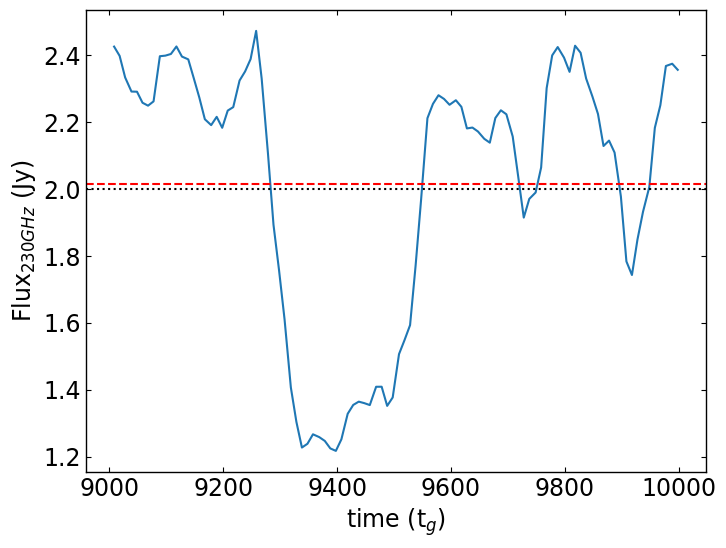

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [55]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.425588 Jy at 9008.139053
97:: 2.397867 Jy at 9017.844868
98:: 2.333341 Jy at 9027.551100
99:: 2.291238 Jy at 9038.646851
100:: 2.290802 Jy at 9048.356431
101:: 2.257794 Jy at 9058.061637
102:: 2.249071 Jy at 9067.764826
103:: 2.261875 Jy at 9077.464542
104:: 2.396812 Jy at 9088.552963
105:: 2.398585 Jy at 9098.254801
106:: 2.403507 Jy at 9107.957635
107:: 2.425950 Jy at 9117.659184
108:: 2.395731 Jy at 9127.363548
109:: 2.387413 Jy at 9138.452062
110:: 2.330845 Jy at 9148.158890
111:: 2.273299 Jy at 9157.868704
112:: 2.208533 Jy at 9167.579583
113:: 2.190891 Jy at 9178.672003
114:: 2.215676 Jy at 9188.377169
115:: 2.182950 Jy at 9198.079088
116:: 2.234317 Jy at 9207.781556
117:: 2.244758 Jy at 9217.482565
118:: 2.324178 Jy at 9228.573654
119:: 2.351249 Jy at 9238.281441
120:: 2.388340 Jy at 9247.990304
121:: 2.472531 Jy at 9257.698128
122:: 2.330194 Jy at 9267.401850
123:: 2.105822 Jy at 9278.487308
124:: 1.893152 Jy at 9288.189770
125:: 1.757913 Jy at 9297.894634
126:: 1.610853

In [23]:
ind,time,z_tot,dscale = bhoss_avg(40, 1, 1, 90, 0, "MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 2.543683 at 9008.139053
97, flux: 2.460633 at 9017.844868
98, flux: 2.386264 at 9027.551100
99, flux: 2.327741 at 9038.646851
100, flux: 2.301486 at 9048.356431
101, flux: 2.222726 at 9058.061637
102, flux: 2.204112 at 9067.764826
103, flux: 2.216997 at 9077.464542
104, flux: 2.341711 at 9088.552963
105, flux: 2.347363 at 9098.254801
106, flux: 2.395227 at 9107.957635
107, flux: 2.447607 at 9117.659184
108, flux: 2.440373 at 9127.363548
109, flux: 2.428139 at 9138.452062
110, flux: 2.358160 at 9148.158890
111, flux: 2.318885 at 9157.868704
112, flux: 2.234819 at 9167.579583
113, flux: 2.278043 at 9178.672003
114, flux: 2.249894 at 9188.377169
115, flux: 2.271997 at 9198.079088
116, flux: 2.367172 at 9207.781556
117, flux: 2.354507 at 9217.482565
118, flux: 2.338155 at 9228.573654
119, flux: 2.376532 at 9238.281441
120, flux: 2.410393 a

In [24]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [25]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh40/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.028139 Jy, the density scale = 1.560000e-18


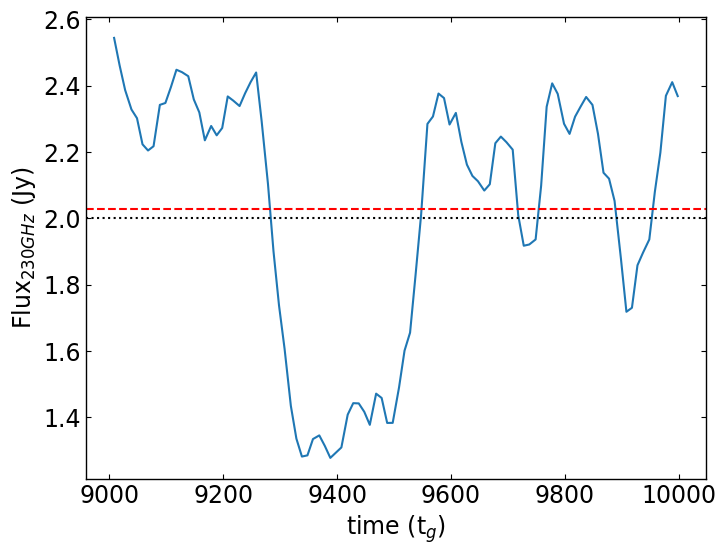

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

## Rhigh=80

In [2]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 10, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc10/BHOSS_CODE
96, flux: 2.185490 at 9008.139053
97, flux: 2.234866 at 9017.844868
98, flux: 2.241800 at 9027.551100
99, flux: 2.246538 at 9038.646851
100, flux: 2.236512 at 9048.356431
101, flux: 2.223379 at 9058.061637
102, flux: 2.185488 at 9067.764826
103, flux: 2.146080 at 9077.464542
104, flux: 2.200538 at 9088.552963
105, flux: 2.175785 at 9098.254801
106, flux: 2.138224 at 9107.957635
107, flux: 2.148658 at 9117.659184
108, flux: 2.117877 at 9127.363548
109, flux: 2.099316 at 9138.452062
110, flux: 2.101998 at 9148.158890
111, flux: 2.075938 at 9157.868704
112, flux: 2.012369 at 9167.579583
113, flux: 1.943945 at 9178.672003
114, flux: 1.933812 at 9188.377169
115, flux: 1.983451 at 9198.079088
116, flux: 2.082163 at 9207.781556
117, flux: 2.119865 at 9217.482565
118, flux: 2.164761 at 9228.573654
119, flux: 2.220476 at 9238.281441
120, flux: 2.280806 at 9247.990304
121, flux: 2.261453 at 9257.698128
122, flux

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.073320 Jy, the density scale = 2.370000e-18


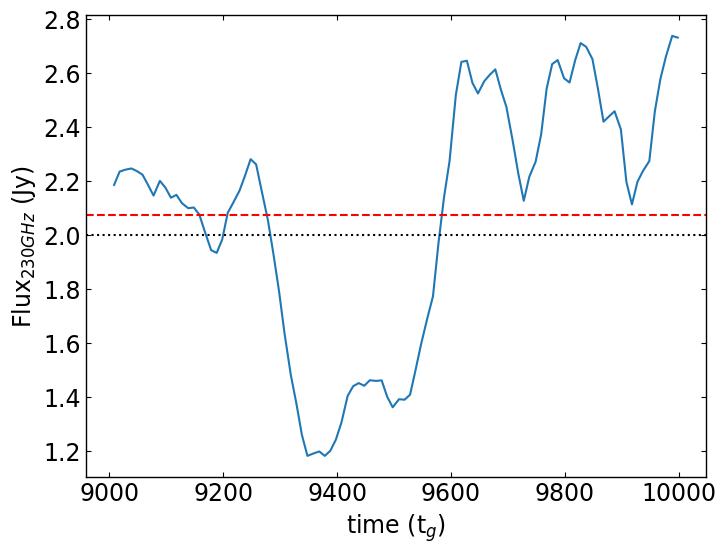

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.185490 Jy at 9008.139053
97:: 2.234866 Jy at 9017.844868
98:: 2.241800 Jy at 9027.551100
99:: 2.246538 Jy at 9038.646851
100:: 2.236512 Jy at 9048.356431
101:: 2.223379 Jy at 9058.061637
102:: 2.185488 Jy at 9067.764826
103:: 2.146080 Jy at 9077.464542
104:: 2.200538 Jy at 9088.552963
105:: 2.175785 Jy at 9098.254801
106:: 2.138224 Jy at 9107.957635
107:: 2.148658 Jy at 9117.659184
108:: 2.117877 Jy at 9127.363548
109:: 2.099316 Jy at 9138.452062
110:: 2.101998 Jy at 9148.158890
111:: 2.075938 Jy at 9157.868704
112:: 2.012369 Jy at 9167.579583
113:: 1.943945 Jy at 9178.672003
114:: 1.933812 Jy at 9188.377169
115:: 1.983451 Jy at 9198.079088
116:: 2.082163 Jy at 9207.781556
117:: 2.119865 Jy at 9217.482565
118:: 2.164761 Jy at 9228.573654
119:: 2.220476 Jy at 9238.281441
120:: 2.280806 Jy at 9247.990304
121:: 2.261453 Jy at 9257.698128
122:: 2.163767 Jy at 9267.401850
123:: 2.054032 Jy at 9278.487308
124:: 1.928281 Jy at 9288.189770
125:: 1.792431 Jy at 9297.894634
126:: 1.635402

In [37]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc30/BHOSS_CODE
96, flux: 2.174357 at 9008.139053
97, flux: 2.218223 at 9017.844868
98, flux: 2.234281 at 9027.551100
99, flux: 2.239007 at 9038.646851
100, flux: 2.222544 at 9048.356431
101, flux: 2.217584 at 9058.061637
102, flux: 2.177889 at 9067.764826
103, flux: 2.139968 at 9077.464542
104, flux: 2.198889 at 9088.552963
105, flux: 2.182814 at 9098.254801
106, flux: 2.149737 at 9107.957635
107, flux: 2.166743 at 9117.659184
108, flux: 2.142854 at 9127.363548
109, flux: 2.134592 at 9138.452062
110, flux: 2.137590 at 9148.158890
111, flux: 2.091044 at 9157.868704
112, flux: 2.035993 at 9167.579583
113, flux: 1.984293 at 9178.672003
114, flux: 2.017175 at 9188.377169
115, flux: 2.021619 at 9198.079088
116, flux: 2.084653 at 9207.781556
117, flux: 2.106738 at 9217.482565
118, flux: 2.168075 at 9228.573654
119, flux: 2.231076 at 9238.281441
120, flux: 2.279238 at 9247.990304
121, flux: 2.265623 at 9257.698128
122, flux

In [38]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [39]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.983459 Jy, the density scale = 2.280000e-18


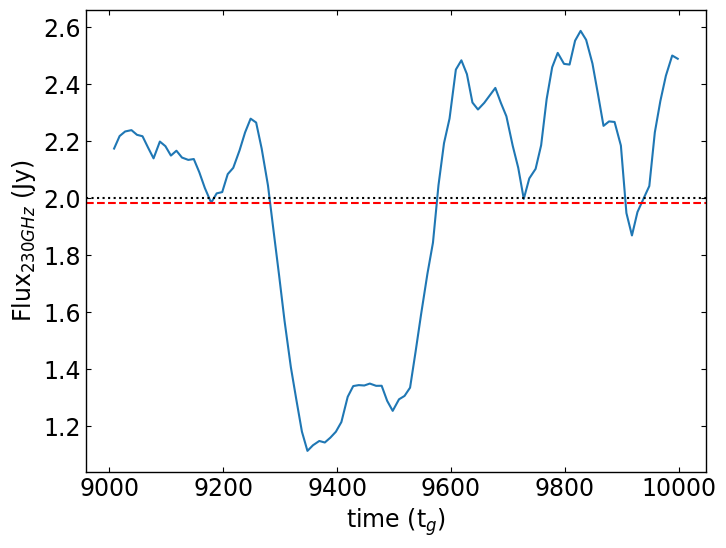

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [41]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.174357 Jy at 9008.139053
97:: 2.218223 Jy at 9017.844868
98:: 2.234281 Jy at 9027.551100
99:: 2.239007 Jy at 9038.646851
100:: 2.222544 Jy at 9048.356431
101:: 2.217584 Jy at 9058.061637
102:: 2.177889 Jy at 9067.764826
103:: 2.139968 Jy at 9077.464542
104:: 2.198889 Jy at 9088.552963
105:: 2.182814 Jy at 9098.254801
106:: 2.149737 Jy at 9107.957635
107:: 2.166743 Jy at 9117.659184
108:: 2.142854 Jy at 9127.363548
109:: 2.134592 Jy at 9138.452062
110:: 2.137590 Jy at 9148.158890
111:: 2.091044 Jy at 9157.868704
112:: 2.035993 Jy at 9167.579583
113:: 1.984293 Jy at 9178.672003
114:: 2.017175 Jy at 9188.377169
115:: 2.021619 Jy at 9198.079088
116:: 2.084653 Jy at 9207.781556
117:: 2.106738 Jy at 9217.482565
118:: 2.168075 Jy at 9228.573654
119:: 2.231076 Jy at 9238.281441
120:: 2.279238 Jy at 9247.990304
121:: 2.265623 Jy at 9257.698128
122:: 2.174337 Jy at 9267.401850
123:: 2.044970 Jy at 9278.487308
124:: 1.887420 Jy at 9288.189770
125:: 1.731817 Jy at 9297.894634
126:: 1.569926

In [42]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 50, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc50/BHOSS_CODE
96, flux: 2.271502 at 9008.139053
97, flux: 2.297067 at 9017.844868
98, flux: 2.312725 at 9027.551100
99, flux: 2.310803 at 9038.646851
100, flux: 2.296661 at 9048.356431
101, flux: 2.302387 at 9058.061637
102, flux: 2.273385 at 9067.764826
103, flux: 2.242387 at 9077.464542
104, flux: 2.343810 at 9088.552963
105, flux: 2.368439 at 9098.254801
106, flux: 2.340304 at 9107.957635
107, flux: 2.352711 at 9117.659184
108, flux: 2.346929 at 9127.363548
109, flux: 2.330252 at 9138.452062
110, flux: 2.328749 at 9148.158890
111, flux: 2.231716 at 9157.868704
112, flux: 2.191852 at 9167.579583
113, flux: 2.170426 at 9178.672003
114, flux: 2.174878 at 9188.377169
115, flux: 2.101118 at 9198.079088
116, flux: 2.146537 at 9207.781556
117, flux: 2.185520 at 9217.482565
118, flux: 2.268532 at 9228.573654
119, flux: 2.360288 at 9238.281441
120, flux: 2.421823 at 9247.990304
121, flux: 2.418310 at 9257.698128
122, flux

In [43]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [44]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.024834 Jy, the density scale = 2.250000e-18


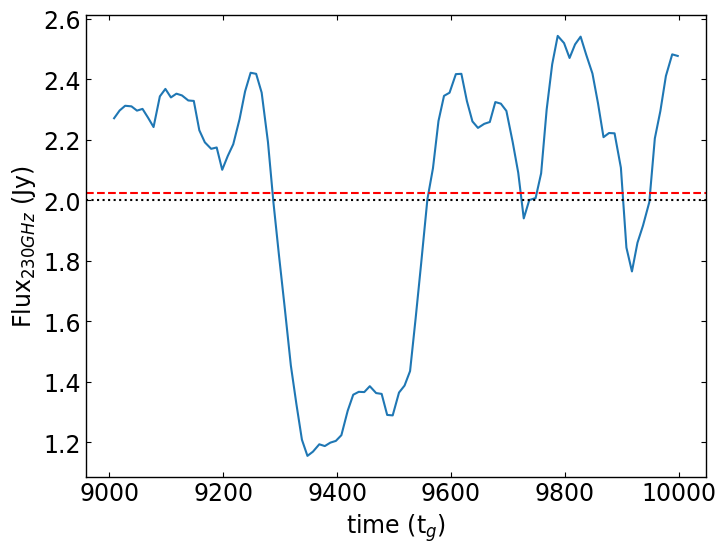

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [46]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.271502 Jy at 9008.139053
97:: 2.297067 Jy at 9017.844868
98:: 2.312725 Jy at 9027.551100
99:: 2.310803 Jy at 9038.646851
100:: 2.296661 Jy at 9048.356431
101:: 2.302387 Jy at 9058.061637
102:: 2.273385 Jy at 9067.764826
103:: 2.242387 Jy at 9077.464542
104:: 2.343810 Jy at 9088.552963
105:: 2.368439 Jy at 9098.254801
106:: 2.340304 Jy at 9107.957635
107:: 2.352711 Jy at 9117.659184
108:: 2.346929 Jy at 9127.363548
109:: 2.330252 Jy at 9138.452062
110:: 2.328749 Jy at 9148.158890
111:: 2.231716 Jy at 9157.868704
112:: 2.191852 Jy at 9167.579583
113:: 2.170426 Jy at 9178.672003
114:: 2.174878 Jy at 9188.377169
115:: 2.101118 Jy at 9198.079088
116:: 2.146537 Jy at 9207.781556
117:: 2.185520 Jy at 9217.482565
118:: 2.268532 Jy at 9228.573654
119:: 2.360288 Jy at 9238.281441
120:: 2.421823 Jy at 9247.990304
121:: 2.418310 Jy at 9257.698128
122:: 2.356102 Jy at 9267.401850
123:: 2.192361 Jy at 9278.487308
124:: 1.991302 Jy at 9288.189770
125:: 1.816988 Jy at 9297.894634
126:: 1.650816

In [47]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc70/BHOSS_CODE
96, flux: 2.341440 at 9008.139053
97, flux: 2.341241 at 9017.844868
98, flux: 2.327588 at 9027.551100
99, flux: 2.317573 at 9038.646851
100, flux: 2.298525 at 9048.356431
101, flux: 2.293354 at 9058.061637
102, flux: 2.285105 at 9067.764826
103, flux: 2.271217 at 9077.464542
104, flux: 2.418022 at 9088.552963
105, flux: 2.471829 at 9098.254801
106, flux: 2.474827 at 9107.957635
107, flux: 2.490442 at 9117.659184
108, flux: 2.462110 at 9127.363548
109, flux: 2.463299 at 9138.452062
110, flux: 2.444834 at 9148.158890
111, flux: 2.377549 at 9157.868704
112, flux: 2.292371 at 9167.579583
113, flux: 2.198521 at 9178.672003
114, flux: 2.208538 at 9188.377169
115, flux: 2.155451 at 9198.079088
116, flux: 2.242922 at 9207.781556
117, flux: 2.302498 at 9217.482565
118, flux: 2.476978 at 9228.573654
119, flux: 2.584157 at 9238.281441
120, flux: 2.622488 at 9247.990304
121, flux: 2.669228 at 9257.698128
122, flux

In [48]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [49]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.046247 Jy, the density scale = 2.210000e-18


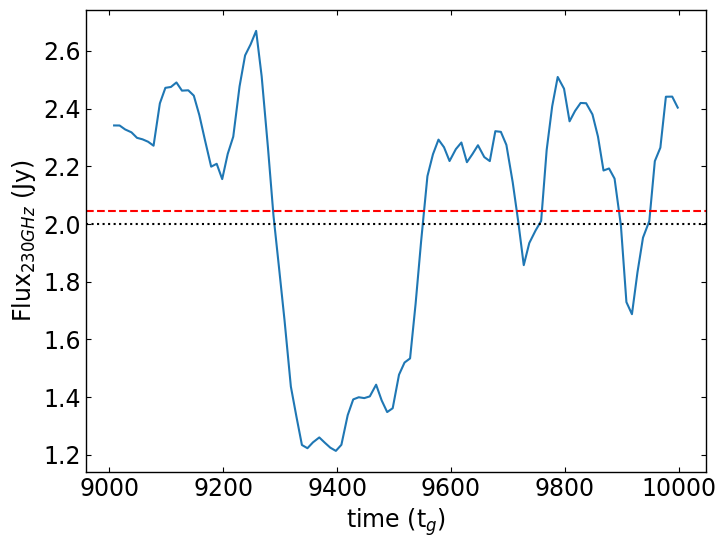

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [51]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.341440 Jy at 9008.139053
97:: 2.341241 Jy at 9017.844868
98:: 2.327588 Jy at 9027.551100
99:: 2.317573 Jy at 9038.646851
100:: 2.298525 Jy at 9048.356431
101:: 2.293354 Jy at 9058.061637
102:: 2.285105 Jy at 9067.764826
103:: 2.271217 Jy at 9077.464542
104:: 2.418022 Jy at 9088.552963
105:: 2.471829 Jy at 9098.254801
106:: 2.474827 Jy at 9107.957635
107:: 2.490442 Jy at 9117.659184
108:: 2.462110 Jy at 9127.363548
109:: 2.463299 Jy at 9138.452062
110:: 2.444834 Jy at 9148.158890
111:: 2.377549 Jy at 9157.868704
112:: 2.292371 Jy at 9167.579583
113:: 2.198521 Jy at 9178.672003
114:: 2.208538 Jy at 9188.377169
115:: 2.155451 Jy at 9198.079088
116:: 2.242922 Jy at 9207.781556
117:: 2.302498 Jy at 9217.482565
118:: 2.476978 Jy at 9228.573654
119:: 2.584157 Jy at 9238.281441
120:: 2.622488 Jy at 9247.990304
121:: 2.669228 Jy at 9257.698128
122:: 2.511782 Jy at 9267.401850
123:: 2.264007 Jy at 9278.487308
124:: 2.028454 Jy at 9288.189770
125:: 1.848336 Jy at 9297.894634
126:: 1.665647

In [52]:
ind,time,z_tot,dscale = bhoss_avg(80, 1, 1, 90, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc90/BHOSS_CODE
96, flux: 2.449673 at 9008.139053
97, flux: 2.391910 at 9017.844868
98, flux: 2.354278 at 9027.551100
99, flux: 2.317279 at 9038.646851
100, flux: 2.269536 at 9048.356431
101, flux: 2.208847 at 9058.061637
102, flux: 2.181735 at 9067.764826
103, flux: 2.174166 at 9077.464542
104, flux: 2.312149 at 9088.552963
105, flux: 2.390325 at 9098.254801
106, flux: 2.427150 at 9107.957635
107, flux: 2.483195 at 9117.659184
108, flux: 2.497671 at 9127.363548
109, flux: 2.489744 at 9138.452062
110, flux: 2.458763 at 9148.158890
111, flux: 2.388649 at 9157.868704
112, flux: 2.274268 at 9167.579583
113, flux: 2.248917 at 9178.672003
114, flux: 2.222632 at 9188.377169
115, flux: 2.222016 at 9198.079088
116, flux: 2.353334 at 9207.781556
117, flux: 2.398114 at 9217.482565
118, flux: 2.465450 at 9228.573654
119, flux: 2.567200 at 9238.281441
120, flux: 2.609727 at 9247.990304
121, flux: 2.620292 at 9257.698128
122, flux

In [53]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [54]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh80/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.033935 Jy, the density scale = 2.180000e-18


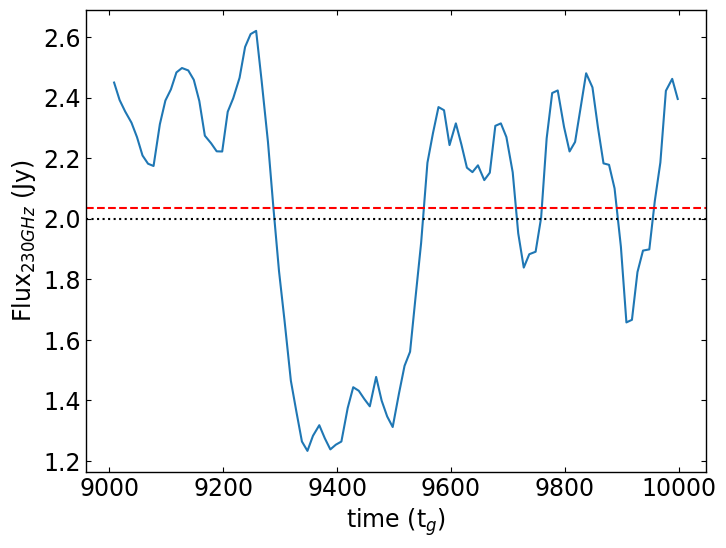

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [56]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.449673 Jy at 9008.139053
97:: 2.391910 Jy at 9017.844868
98:: 2.354278 Jy at 9027.551100
99:: 2.317279 Jy at 9038.646851
100:: 2.269536 Jy at 9048.356431
101:: 2.208847 Jy at 9058.061637
102:: 2.181735 Jy at 9067.764826
103:: 2.174166 Jy at 9077.464542
104:: 2.312149 Jy at 9088.552963
105:: 2.390325 Jy at 9098.254801
106:: 2.427150 Jy at 9107.957635
107:: 2.483195 Jy at 9117.659184
108:: 2.497671 Jy at 9127.363548
109:: 2.489744 Jy at 9138.452062
110:: 2.458763 Jy at 9148.158890
111:: 2.388649 Jy at 9157.868704
112:: 2.274268 Jy at 9167.579583
113:: 2.248917 Jy at 9178.672003
114:: 2.222632 Jy at 9188.377169
115:: 2.222016 Jy at 9198.079088
116:: 2.353334 Jy at 9207.781556
117:: 2.398114 Jy at 9217.482565
118:: 2.465450 Jy at 9228.573654
119:: 2.567200 Jy at 9238.281441
120:: 2.609727 Jy at 9247.990304
121:: 2.620292 Jy at 9257.698128
122:: 2.454240 Jy at 9267.401850
123:: 2.253257 Jy at 9278.487308
124:: 2.032902 Jy at 9288.189770
125:: 1.826768 Jy at 9297.894634
126:: 1.663352

## Rhigh=160

In [27]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 10, 0, "MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 2.026118 at 9008.139053
97, flux: 2.053357 at 9017.844868
98, flux: 2.075643 at 9027.551100
99, flux: 2.115434 at 9038.646851
100, flux: 2.111824 at 9048.356431
101, flux: 2.128561 at 9058.061637
102, flux: 2.108884 at 9067.764826
103, flux: 2.059831 at 9077.464542
104, flux: 2.104065 at 9088.552963
105, flux: 2.118269 at 9098.254801
106, flux: 2.090076 at 9107.957635
107, flux: 2.103995 at 9117.659184
108, flux: 2.082593 at 9127.363548
109, flux: 2.067905 at 9138.452062
110, flux: 2.080450 at 9148.158890
111, flux: 2.078132 at 9157.868704
112, flux: 2.008212 at 9167.579583
113, flux: 1.892183 at 9178.672003
114, flux: 1.858088 at 9188.377169
115, flux: 1.872270 at 9198.079088
116, flux: 1.962470 at 9207.781556
117, flux: 2.039470 at 9217.482565
118, flux: 2.163950 at 9228.573654
119, flux: 2.274282 at 9238.281441
120, flux: 2.398172 

In [28]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [29]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.027693 Jy, the density scale = 3.270000e-18


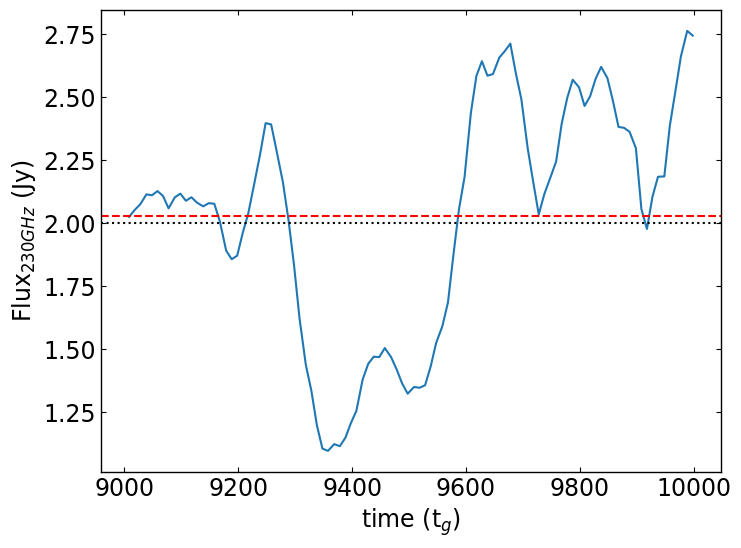

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [24]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 30, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc30/BHOSS_CODE
96, flux: 2.038596 at 9008.139053
97, flux: 2.058374 at 9017.844868
98, flux: 2.098856 at 9027.551100
99, flux: 2.150332 at 9038.646851
100, flux: 2.140823 at 9048.356431
101, flux: 2.177085 at 9058.061637
102, flux: 2.155481 at 9067.764826
103, flux: 2.107533 at 9077.464542
104, flux: 2.156626 at 9088.552963
105, flux: 2.184073 at 9098.254801
106, flux: 2.161686 at 9107.957635
107, flux: 2.178996 at 9117.659184
108, flux: 2.170222 at 9127.363548
109, flux: 2.165855 at 9138.452062
110, flux: 2.168686 at 9148.158890
111, flux: 2.147650 at 9157.868704
112, flux: 2.088727 at 9167.579583
113, flux: 1.986253 at 9178.672003
114, flux: 1.993261 at 9188.377169
115, flux: 1.961054 at 9198.079088
116, flux: 2.007248 at 9207.781556
117, flux: 2.069990 at 9217.482565
118, flux: 2.219689 at 9228.573654
119, flux: 2.351544 at 9238.281441
120, flux: 2.466968 at 9247.990304
121, flux: 2.467684 at 9257.698128
122, flu

In [25]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [26]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.980199 Jy, the density scale = 3.200000e-18


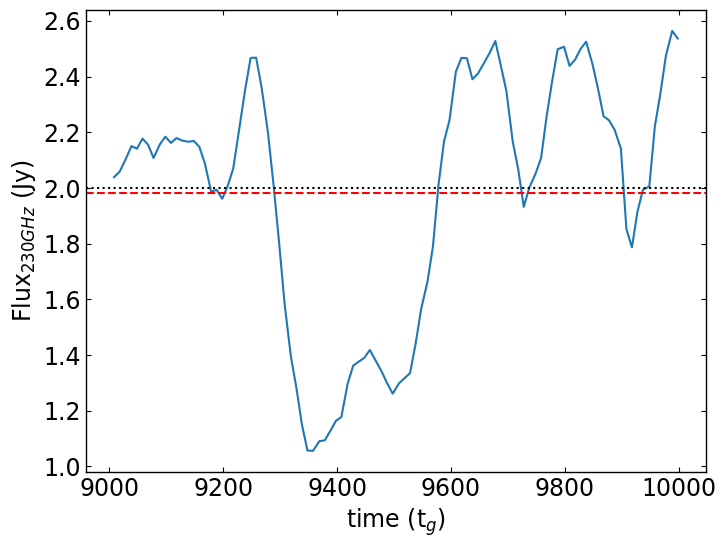

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [28]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.038596 Jy at 9008.139053
97:: 2.058374 Jy at 9017.844868
98:: 2.098856 Jy at 9027.551100
99:: 2.150332 Jy at 9038.646851
100:: 2.140823 Jy at 9048.356431
101:: 2.177085 Jy at 9058.061637
102:: 2.155481 Jy at 9067.764826
103:: 2.107533 Jy at 9077.464542
104:: 2.156626 Jy at 9088.552963
105:: 2.184073 Jy at 9098.254801
106:: 2.161686 Jy at 9107.957635
107:: 2.178996 Jy at 9117.659184
108:: 2.170222 Jy at 9127.363548
109:: 2.165855 Jy at 9138.452062
110:: 2.168686 Jy at 9148.158890
111:: 2.147650 Jy at 9157.868704
112:: 2.088727 Jy at 9167.579583
113:: 1.986253 Jy at 9178.672003
114:: 1.993261 Jy at 9188.377169
115:: 1.961054 Jy at 9198.079088
116:: 2.007248 Jy at 9207.781556
117:: 2.069990 Jy at 9217.482565
118:: 2.219689 Jy at 9228.573654
119:: 2.351544 Jy at 9238.281441
120:: 2.466968 Jy at 9247.990304
121:: 2.467684 Jy at 9257.698128
122:: 2.359425 Jy at 9267.401850
123:: 2.198286 Jy at 9278.487308
124:: 2.013002 Jy at 9288.189770
125:: 1.807049 Jy at 9297.894634
126:: 1.585313

In [31]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 50, 0, "MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 2.070129 at 9008.139053
97, flux: 2.092285 at 9017.844868
98, flux: 2.144458 at 9027.551100
99, flux: 2.196923 at 9038.646851
100, flux: 2.193518 at 9048.356431
101, flux: 2.246637 at 9058.061637
102, flux: 2.237251 at 9067.764826
103, flux: 2.187049 at 9077.464542
104, flux: 2.276920 at 9088.552963
105, flux: 2.361495 at 9098.254801
106, flux: 2.344876 at 9107.957635
107, flux: 2.350585 at 9117.659184
108, flux: 2.368909 at 9127.363548
109, flux: 2.341447 at 9138.452062
110, flux: 2.349025 at 9148.158890
111, flux: 2.272253 at 9157.868704
112, flux: 2.227984 at 9167.579583
113, flux: 2.142635 at 9178.672003
114, flux: 2.107691 at 9188.377169
115, flux: 1.994148 at 9198.079088
116, flux: 2.030440 at 9207.781556
117, flux: 2.123611 at 9217.482565
118, flux: 2.301330 at 9228.573654
119, flux: 2.474448 at 9238.281441
120, flux: 2.596447 

In [32]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [33]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.002414 Jy, the density scale = 3.170000e-18


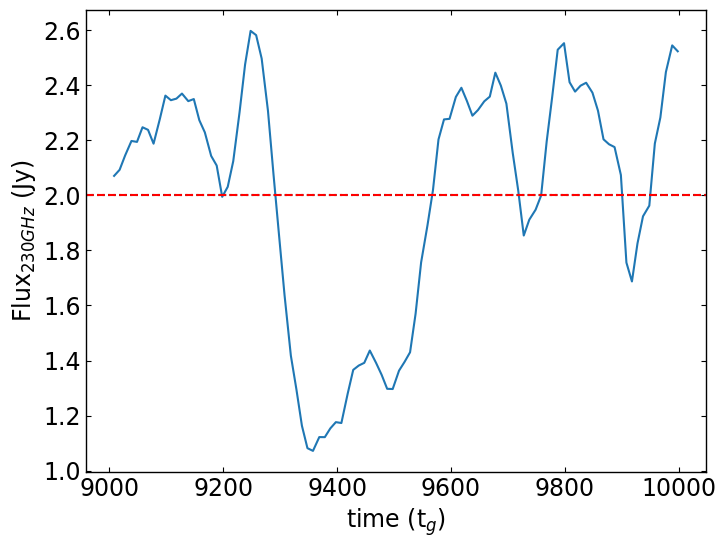

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [34]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 70, 0, "MADS41A93")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc70/BHOSS_CODE
96, flux: 2.137126 at 9008.139053
97, flux: 2.140879 at 9017.844868
98, flux: 2.172102 at 9027.551100
99, flux: 2.206305 at 9038.646851
100, flux: 2.191171 at 9048.356431
101, flux: 2.236597 at 9058.061637
102, flux: 2.243803 at 9067.764826
103, flux: 2.201494 at 9077.464542
104, flux: 2.320859 at 9088.552963
105, flux: 2.428209 at 9098.254801
106, flux: 2.452238 at 9107.957635
107, flux: 2.470140 at 9117.659184
108, flux: 2.471518 at 9127.363548
109, flux: 2.480743 at 9138.452062
110, flux: 2.495270 at 9148.158890
111, flux: 2.438131 at 9157.868704
112, flux: 2.334485 at 9167.579583
113, flux: 2.142561 at 9178.672003
114, flux: 2.133615 at 9188.377169
115, flux: 2.044837 at 9198.079088
116, flux: 2.134418 at 9207.781556
117, flux: 2.244919 at 9217.482565
118, flux: 2.500111 at 9228.573654
119, flux: 2.724203 at 9238.281441
120, flux: 2.792030 at 9247.990304
121, flux: 2.790282 at 9257.698128
122, flu

In [35]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [36]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 2.026205 Jy, the density scale = 3.160000e-18


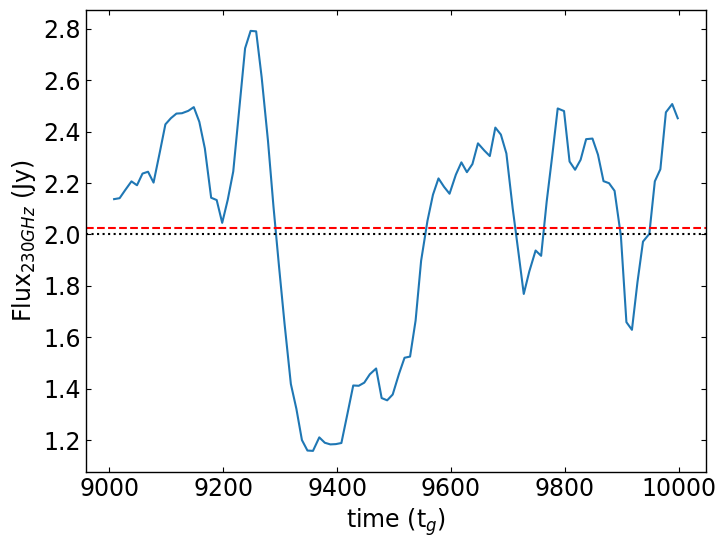

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [38]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

96:: 2.137126 Jy at 9008.139053
97:: 2.140879 Jy at 9017.844868
98:: 2.172102 Jy at 9027.551100
99:: 2.206305 Jy at 9038.646851
100:: 2.191171 Jy at 9048.356431
101:: 2.236597 Jy at 9058.061637
102:: 2.243803 Jy at 9067.764826
103:: 2.201494 Jy at 9077.464542
104:: 2.320859 Jy at 9088.552963
105:: 2.428209 Jy at 9098.254801
106:: 2.452238 Jy at 9107.957635
107:: 2.470140 Jy at 9117.659184
108:: 2.471518 Jy at 9127.363548
109:: 2.480743 Jy at 9138.452062
110:: 2.495270 Jy at 9148.158890
111:: 2.438131 Jy at 9157.868704
112:: 2.334485 Jy at 9167.579583
113:: 2.142561 Jy at 9178.672003
114:: 2.133615 Jy at 9188.377169
115:: 2.044837 Jy at 9198.079088
116:: 2.134418 Jy at 9207.781556
117:: 2.244919 Jy at 9217.482565
118:: 2.500111 Jy at 9228.573654
119:: 2.724203 Jy at 9238.281441
120:: 2.792030 Jy at 9247.990304
121:: 2.790282 Jy at 9257.698128
122:: 2.611396 Jy at 9267.401850
123:: 2.364389 Jy at 9278.487308
124:: 2.107499 Jy at 9288.189770
125:: 1.875099 Jy at 9297.894634
126:: 1.652423

In [35]:
ind,time,z_tot,dscale = bhoss_avg(160, 1, 1, 90, 0, "MADS41A93", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
96, flux: 2.234259 at 9008.139053
97, flux: 2.189646 at 9017.844868
98, flux: 2.182949 at 9027.551100
99, flux: 2.175831 at 9038.646851
100, flux: 2.128983 at 9048.356431
101, flux: 2.098565 at 9058.061637
102, flux: 2.081015 at 9067.764826
103, flux: 2.044717 at 9077.464542
104, flux: 2.170321 at 9088.552963
105, flux: 2.304740 at 9098.254801
106, flux: 2.371020 at 9107.957635
107, flux: 2.456728 at 9117.659184
108, flux: 2.492675 at 9127.363548
109, flux: 2.512202 at 9138.452062
110, flux: 2.519515 at 9148.158890
111, flux: 2.446522 at 9157.868704
112, flux: 2.300695 at 9167.579583
113, flux: 2.168767 at 9178.672003
114, flux: 2.148055 at 9188.377169
115, flux: 2.111552 at 9198.079088
116, flux: 2.235595 at 9207.781556
117, flux: 2.329960 at 9217.482565
118, flux: 2.487135 at 9228.573654
119, flux: 2.686523 at 9238.281441
120, flux: 2.768873 

In [36]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [37]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA93/Rh160/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 96/195/100
average z_tot = 1.997843 Jy, the density scale = 3.120000e-18


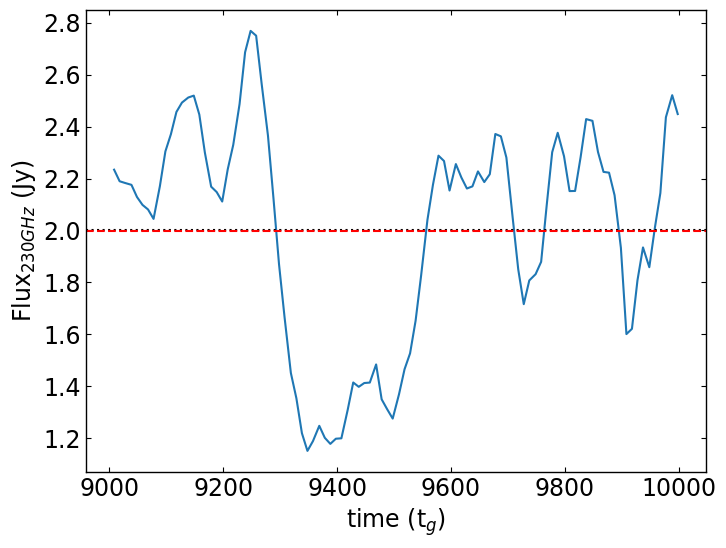

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))